# Anomaly detection

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
ll -h ../data/collected/

total 25048
-rw-r--r--@ 1 xihajun  staff   1.0M 22 Jul 15:24 06_13_2017-ad-kemoge-lookout-1be29a6622543f6f5063eda1d83a4e49.pcap_ISCX.csv
-rw-r--r--@ 1 xihajun  staff    89K 16 Jul 12:21 AnotherMonitorRecord-2019-07-16-11-52-39.csv
-rw-r--r--@ 1 xihajun  staff    95K 21 Jul 15:40 AnotherMonitorRecord-2019-07-21-15-10-35.csv
-rw-r--r--@ 1 xihajun  staff   1.1M 21 Jul 22:33 AnotherMonitorRecord-2019-07-21-16-38-53.csv
-rw-r--r--  1 xihajun  staff   1.1M  7 Jul 15:59 SeraphimDroidRecord-2019-07-06-19-03-13.csv
-rw-r--r--  1 xihajun  staff   123K  7 Jul 15:59 SeraphimDroidRecord-2019-07-07-14-19-50.csv
-rw-r--r--@ 1 xihajun  staff   195K 14 Jul 13:52 SeraphimDroidRecord-2019-07-14-10-28-00.csv
-rw-r--r--@ 1 xihajun  staff   1.0M 22 Jul 15:24 SeraphimDroidRecord-2019-07-22-10-31-24.csv
-rw-r--r--  1 xihajun  staff   254K  7 Jul 16:01 networkmonitor-3.csv
-rw-r--r--  1 xihajun  staff    67K  7 Jul 15:59 networkmonitor-mal.csv
-rw-r--r--@ 1 xihajun  staff   106K 14 Jul 16:19 networkmonitor-mal

In [2]:
raw_data = pd.read_csv("../data/collected/SeraphimDroidRecord-2019-07-06-19-03-13.csv",header = 1)

In [1064]:
raw_data = pd.read_csv("../data/collected/AnotherMonitorRecord-2019-07-16-11-52-39.csv",header = 1)

In [7]:
raw_data = pd.read_csv("../data/collected/SeraphimDroidRecord-2019-07-14-10-28-00.csv",header = 1)

In [227]:
raw_data = pd.read_csv("../data/collected/AnotherMonitorRecord-2019-07-21-15-10-35.csv",header = 1)

In [940]:
raw_data = pd.read_csv("../data/collected/AnotherMonitorRecord-2019-07-21-16-38-53.csv",header = 1)

In [110]:
raw_data = pd.read_csv("../data/collected/SeraphimDroidRecord-2019-07-22-10-31-24.csv",header = 1)

In [60]:
raw_data = pd.read_csv("../../data/real test1/SeraphimDroidRecord-2019-08-01-06-26-51.csv",header = 1)

In [213]:
raw_data = pd.read_csv("../data/collected/1.csv",header = 5)

In [223]:
raw_data

,2.75,1.25,37732,Unnamed: 3,865716,684832,285728,399104,147456,2.6343212,0.0
0,1.767677,1.010101,37732,NaN,865768,684780,286748,398032,147456,2.060460,0.000000
1,2.005012,1.002506,37732,NaN,865672,684876,286856,398020,147456,1.752064,0.000000
2,1.015228,1.015228,37732,NaN,866056,684492,286600,398016,147456,1.267768,0.000000
3,2.250000,1.250000,37732,NaN,865812,684736,286716,398020,147456,1.238388,0.000000
4,2.791878,3.045685,37732,NaN,866300,684248,286228,398020,147456,0.639659,0.000000
5,2.255639,1.253133,37732,NaN,866424,684124,286104,398020,147456,0.673109,0.000000
6,2.250000,1.250000,37732,NaN,866720,683828,285808,398020,147456,1.006524,0.000000
7,2.756892,1.002506,37732,NaN,866796,683752,285732,398020,147456,1.143550,0.000000
8,2.770781,2.770781,37732,NaN,866060,684488,286468,398020,147456,1.351467,0.000000
9,2.743142,2.244389,37732,NaN,866060,684488,286468,398020,147456,0.292644,0.000000


(array([486.,  61.,  30.,  24.,  12.,   9.,   2.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  0.        ,  11.38986825,  22.7797365 ,  34.16960475,
         45.559473  ,  56.94934125,  68.3392095 ,  79.72907775,
         91.118946  , 102.50881425, 113.8986825 , 125.28855075,
        136.678419  , 148.06828725, 159.4581555 , 170.84802375,
        182.237892  , 193.62776025, 205.0176285 , 216.40749675,
        227.797365  , 239.18723325, 250.5771015 , 261.96696975,
        273.356838  , 284.74670625, 296.1365745 , 307.52644275,
        318.916311  , 330.30617925, 341.6960475 , 353.08591575,
        364.475784  , 375.86565225, 387.2555205 , 398.64538875,
        410.035257  , 421.42512525, 432.8149935 , 444.20486175,
        455.59473   ]),
 <a list of 40 Patch objects>)

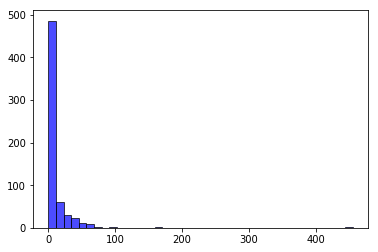

In [225]:
plt.figure()
plt.hist(raw_data['0.0'], bins=40, normed=0, facecolor="blue", edgecolor="black", alpha=0.7)

In [198]:
raw_data = raw_data.drop(['Unnamed: 3','Threshold (kB)'],axis=1)
raw_data.head()

,Total CPU usage (%),SeraphimDroid (Pid 4529) CPU usage (%),SeraphimDroid Memory (kB),Memory used (kB),Memory available (MemFree+Cached) (kB),MemFree (kB),Cached (kB)
0,3.084833,2.056555,39948,601260,949288,308184,641104
1,3.241895,1.246883,39948,601412,949136,307036,642100
2,11.794871,0.769231,39948,592212,958336,313820,644640
3,1.772152,0.253165,39948,586868,963680,318968,644836
4,21.945137,0.249377,39948,587656,962892,312308,650584


In [199]:
raw_data['mycpu'] = raw_data['SeraphimDroid (Pid 4529) CPU usage (%)']
raw_data = raw_data.drop(['SeraphimDroid (Pid 4529) CPU usage (%)'],axis=1)

In [200]:
memory_avail = raw_data['Memory available (MemFree+Cached) (kB)']
memfree = raw_data['MemFree (kB)']
total_cpu = raw_data['Total CPU usage (%)']
SeraphimDroid = raw_data['mycpu']
Cached = raw_data['Cached (kB)']

/Users/xihajun/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


(array([3.071e+03, 9.903e+03, 3.013e+03, 2.230e+02, 1.500e+01, 1.400e+01,
        6.000e+00, 3.000e+00, 3.000e+00, 4.000e+00, 6.000e+00, 1.700e+01,
        5.700e+01, 1.060e+02, 1.310e+02, 9.900e+01, 3.300e+01, 1.000e+01,
        1.400e+01, 6.000e+00, 1.000e+00, 4.000e+00, 1.000e+00, 1.000e+00,
        2.000e+00, 1.000e+00, 3.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0.51150894,  2.15617972,  3.80085049,  5.44552127,  7.09019205,
         8.73486282, 10.3795336 , 12.02420438, 13.66887515, 15.31354593,
        16.9582167 , 18.60288748, 20.24755826, 21.89222903, 23.53689981,
        25.18157059, 26.82624136, 28.47091214, 30.11558292, 31.76025369,
        33.40492447, 35.04959525, 36.69426602, 38.3389368 , 39.98360758,
        41.62827835, 43.27294913, 44.91761991, 46.56229068, 48.20696146,
        49.85163223, 51.49630301, 53.14097379, 54.78564456, 56.4

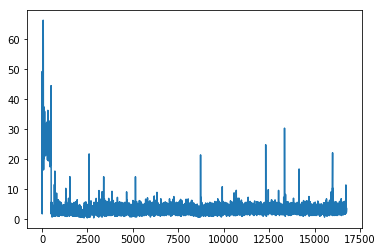

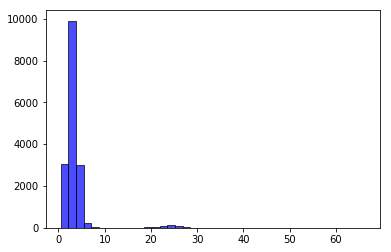

In [117]:
plt.figure()
plt.plot(total_cpu)
plt.figure()
plt.hist(total_cpu, bins=40, normed=0, facecolor="blue", edgecolor="black", alpha=0.7)

(array([   5.,    6.,   28.,  109.,   48.,   29.,   57.,   72.,   87.,
          33.,   37.,  150.,  436.,   38.,   24.,  194.,   14.,  248.,
         824.,  658., 2170.,   56.,    0.,    0.,   48.,  478., 1974.,
        2489., 1065., 1411.,  602.,  621., 1772.,  432.,   59.,   13.,
           0.,    9.,   56.,  401.]),
 array([281224. , 283646.2, 286068.4, 288490.6, 290912.8, 293335. ,
        295757.2, 298179.4, 300601.6, 303023.8, 305446. , 307868.2,
        310290.4, 312712.6, 315134.8, 317557. , 319979.2, 322401.4,
        324823.6, 327245.8, 329668. , 332090.2, 334512.4, 336934.6,
        339356.8, 341779. , 344201.2, 346623.4, 349045.6, 351467.8,
        353890. , 356312.2, 358734.4, 361156.6, 363578.8, 366001. ,
        368423.2, 370845.4, 373267.6, 375689.8, 378112. ]),
 <a list of 40 Patch objects>)

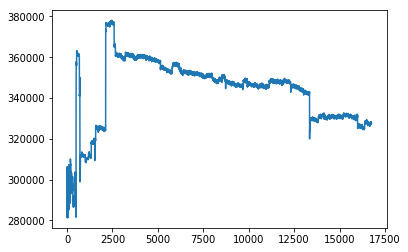

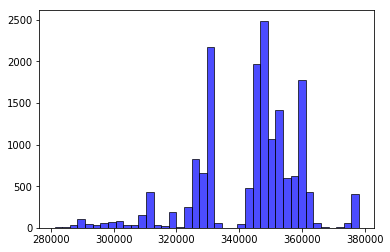

In [118]:
plt.figure()
plt.plot(memfree)
plt.figure()
plt.hist(memfree, bins=40, normed=0, facecolor="blue", edgecolor="black", alpha=0.7)

(array([2.300e+02, 2.030e+02, 1.200e+01, 4.900e+01, 5.000e+00, 3.900e+01,
        0.000e+00, 4.900e+02, 3.890e+02, 5.000e+00, 1.043e+03, 3.126e+03,
        5.090e+02, 6.867e+03, 1.470e+03, 7.300e+02, 5.990e+02, 3.540e+02,
        1.370e+02, 2.220e+02, 1.260e+02, 4.500e+01, 2.800e+01, 2.700e+01,
        1.700e+01, 8.000e+00, 8.000e+00, 3.000e+00, 3.000e+00, 0.000e+00,
        3.000e+00, 1.000e+00, 0.000e+00, 3.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([0.        , 0.17578125, 0.3515625 , 0.52734375, 0.703125  ,
        0.87890625, 1.0546875 , 1.23046875, 1.40625   , 1.58203125,
        1.7578125 , 1.93359375, 2.109375  , 2.28515625, 2.4609375 ,
        2.63671875, 2.8125    , 2.98828125, 3.1640625 , 3.33984375,
        3.515625  , 3.69140625, 3.8671875 , 4.04296875, 4.21875   ,
        4.39453125, 4.5703125 , 4.74609375, 4.921875  , 5.09765625,
        5.2734375 , 5.44921875, 5.625     , 5.80078125, 5.9765625 ,
        6.15234375, 6.3281

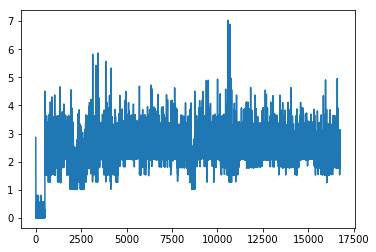

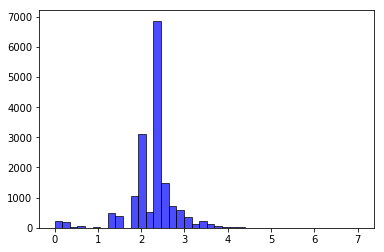

In [10]:
plt.figure()
plt.plot(SeraphimDroid)
plt.figure()
plt.hist(SeraphimDroid, bins=40, normed=0, facecolor="blue", edgecolor="black", alpha=0.7)

(array([1.900e+01, 2.300e+01, 5.900e+01, 3.800e+01, 1.800e+01, 2.100e+01,
        3.900e+01, 3.100e+01, 4.200e+01, 2.900e+01, 3.400e+01, 3.500e+01,
        3.200e+01, 1.100e+01, 1.000e+00, 1.000e+00, 4.000e+00, 1.000e+00,
        5.000e+00, 8.000e+00, 5.100e+01, 2.000e+01, 7.490e+02, 9.000e+00,
        5.100e+01, 6.250e+02, 1.050e+02, 0.000e+00, 1.000e+00, 5.000e+00,
        8.000e+00, 1.300e+01, 1.600e+01, 2.440e+02, 3.077e+03, 1.416e+03,
        5.691e+03, 1.284e+03, 2.486e+03, 4.510e+02]),
 array([648112. , 651908.1, 655704.2, 659500.3, 663296.4, 667092.5,
        670888.6, 674684.7, 678480.8, 682276.9, 686073. , 689869.1,
        693665.2, 697461.3, 701257.4, 705053.5, 708849.6, 712645.7,
        716441.8, 720237.9, 724034. , 727830.1, 731626.2, 735422.3,
        739218.4, 743014.5, 746810.6, 750606.7, 754402.8, 758198.9,
        761995. , 765791.1, 769587.2, 773383.3, 777179.4, 780975.5,
        784771.6, 788567.7, 792363.8, 796159.9, 799956. ]),
 <a list of 40 Patch objects>)

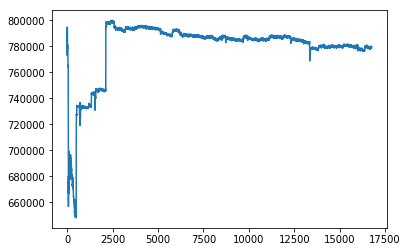

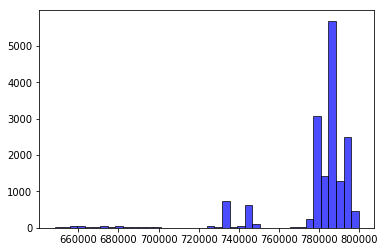

In [11]:
plt.figure()
plt.plot(memory_avail)
plt.figure()
plt.hist(memory_avail, bins=40, normed=0, facecolor="blue", edgecolor="black", alpha=0.7)

(array([9.000e+00, 3.400e+01, 3.000e+01, 2.200e+01, 2.700e+01, 2.090e+02,
        2.500e+01, 7.500e+01, 2.100e+01, 1.040e+02, 2.900e+01, 5.400e+01,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 4.460e+02,
        1.267e+03, 2.440e+02, 1.008e+03, 5.013e+03, 4.663e+03, 1.000e+00,
        2.645e+03, 7.620e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.600e+01, 1.600e+01, 1.900e+01, 1.000e+00, 7.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00]),
 array([349188. , 353193.6, 357199.2, 361204.8, 365210.4, 369216. ,
        373221.6, 377227.2, 381232.8, 385238.4, 389244. , 393249.6,
        397255.2, 401260.8, 405266.4, 409272. , 413277.6, 417283.2,
        421288.8, 425294.4, 429300. , 433305.6, 437311.2, 441316.8,
        445322.4, 449328. , 453333.6, 457339.2, 461344.8, 465350.4,
        469356. , 473361.6, 477367.2, 481372.8, 485378.4, 489384. ,
        493389.6, 497395.2, 501400.8, 505406.4, 509412. ]),
 <a list of 40 Patch objects>)

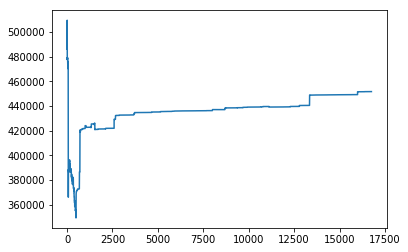

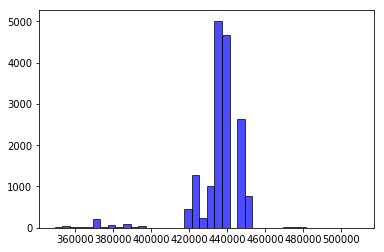

In [12]:
plt.figure()
plt.plot(Cached)
plt.figure()
plt.hist(Cached, bins=40, normed=0, facecolor="blue", edgecolor="black", alpha=0.7)

In [13]:
def localoutlierfactor(data, predict, k):
    from sklearn.neighbors import LocalOutlierFactor
    clf = LocalOutlierFactor(n_neighbors=k + 1, algorithm='auto', contamination=0.1, n_jobs=-1)
    clf.fit(data)
    # 记录 k 邻域距离
    predict['k distances'] = clf.kneighbors(predict)[0].max(axis=1)
    # 记录 LOF 离群因子，做相反数处理
    predict['local outlier factor'] = -clf._decision_function(predict.iloc[:, :-1])
    return predict

def plot_lof(result, method):
    import matplotlib.pyplot as plt
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
    plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
    plt.figure(figsize=(8, 4)).add_subplot(111)
    plt.scatter(result[result['local outlier factor'] > method].index,
                result[result['local outlier factor'] > method]['local outlier factor'], c='red', s=50,
                marker='.', alpha=None,
                label='离群点')
    plt.scatter(result[result['local outlier factor'] <= method].index,
                result[result['local outlier factor'] <= method]['local outlier factor'], c='black', s=50,
                marker='.', alpha=None, label='正常点')
    plt.hlines(method, -2, 2 + max(result.index), linestyles='--')
    plt.xlim(-2, 2 + max(result.index))
    plt.title('LOF局部离群点检测', fontsize=13)
    plt.ylabel('局部离群因子', fontsize=15)
    plt.legend()
    plt.show()

def lof(data, predict=None, k=5, method=1, plot=False):
    import pandas as pd
    # 判断是否传入测试数据，若没有传入则测试数据赋值为训练数据
    try:
        if predict == None:
            predict = data.copy()
    except Exception:
        pass
    predict = pd.DataFrame(predict)
    # 计算 LOF 离群因子
    predict = localoutlierfactor(data, predict, k)
    if plot == True:
        plot_lof(predict, method)
    # 根据阈值划分离群点与正常点
    outliers = predict[predict['local outlier factor'] > method].sort_values(by='local outlier factor')
    inliers = predict[predict['local outlier factor'] <= method].sort_values(by='local outlier factor')
    return outliers, inliers

In [14]:
import numpy as np
import pandas as pd

memory_avail = raw_data['Memory available (MemFree+Cached) (kB)']
memfree = raw_data['MemFree (kB)']
total_cpu = raw_data['Total CPU usage (%)']
SeraphimDroid = raw_data['mycpu']
Cached = raw_data['Cached (kB)']
memused = raw_data['Memory used (kB)']

a = np.array(memory_avail)  
b = np.array(memfree)  
c = np.array(total_cpu)  
d = np.array(SeraphimDroid)  
e = np.array(Cached) 
f = np.array(memused)

A = list(zip(a,b,c,d,e,f))  

outliers3, inliers3 = lof(A,k=1, method=5)

In [15]:
B = list(zip(np.array(all_data)))
outliers3, inliers3 = lof(A,k=1, method=5)

NameError: name 'all_data' is not defined

In [16]:
outliers3

,0,1,2,3,4,5,k distances,local outlier factor
6457,788472,352532,2.910053,2.380952,435940,762076,13.856406,5.082004e+00
16551,778368,326824,2.368421,2.105263,451544,772180,27.714543,5.195827e+00
15510,779660,330592,2.356021,2.094241,449068,770888,26.254215,5.226222e+00
4857,792728,357680,1.856764,2.387268,435048,757820,21.167672,5.279580e+00
12135,786692,347532,2.849741,2.072539,439168,763856,11.316324,5.301422e+00
12710,784248,344672,3.149606,2.362205,439576,766300,21.167726,5.332119e+00
9791,787620,348772,4.155844,2.337662,438848,762928,30.983889,5.387805e+00
13577,778020,329220,3.133159,1.827676,448800,772528,19.185314,5.388891e+00
5463,789020,353548,4.884319,3.341902,435472,761528,38.407386,5.441653e+00
16420,779848,328320,3.385417,2.343750,451528,770700,13.858219,5.447875e+00


In [1083]:
outliers3['target'] = 'outliers'
inliers3['target'] = 'inliers'
temp = pd.concat([outliers3,inliers3])
temp.head()

,0,1,2,3,4,5,k distances,local outlier factor,target
1221,704256,336880,19.667590,0.0,367376,846292,161.755482,5.211588,outliers
417,757124,357020,25.252525,0.0,400104,793424,161.755102,5.645271,outliers
827,735144,340584,19.113573,0.0,394560,815404,55.429687,5.702742,outliers
1404,698996,356324,22.316383,0.0,342672,851552,219.458143,6.450443,outliers
1501,699944,349464,17.231638,0.0,350480,850604,83.146741,6.512928,outliers


In [1157]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(raw_data)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

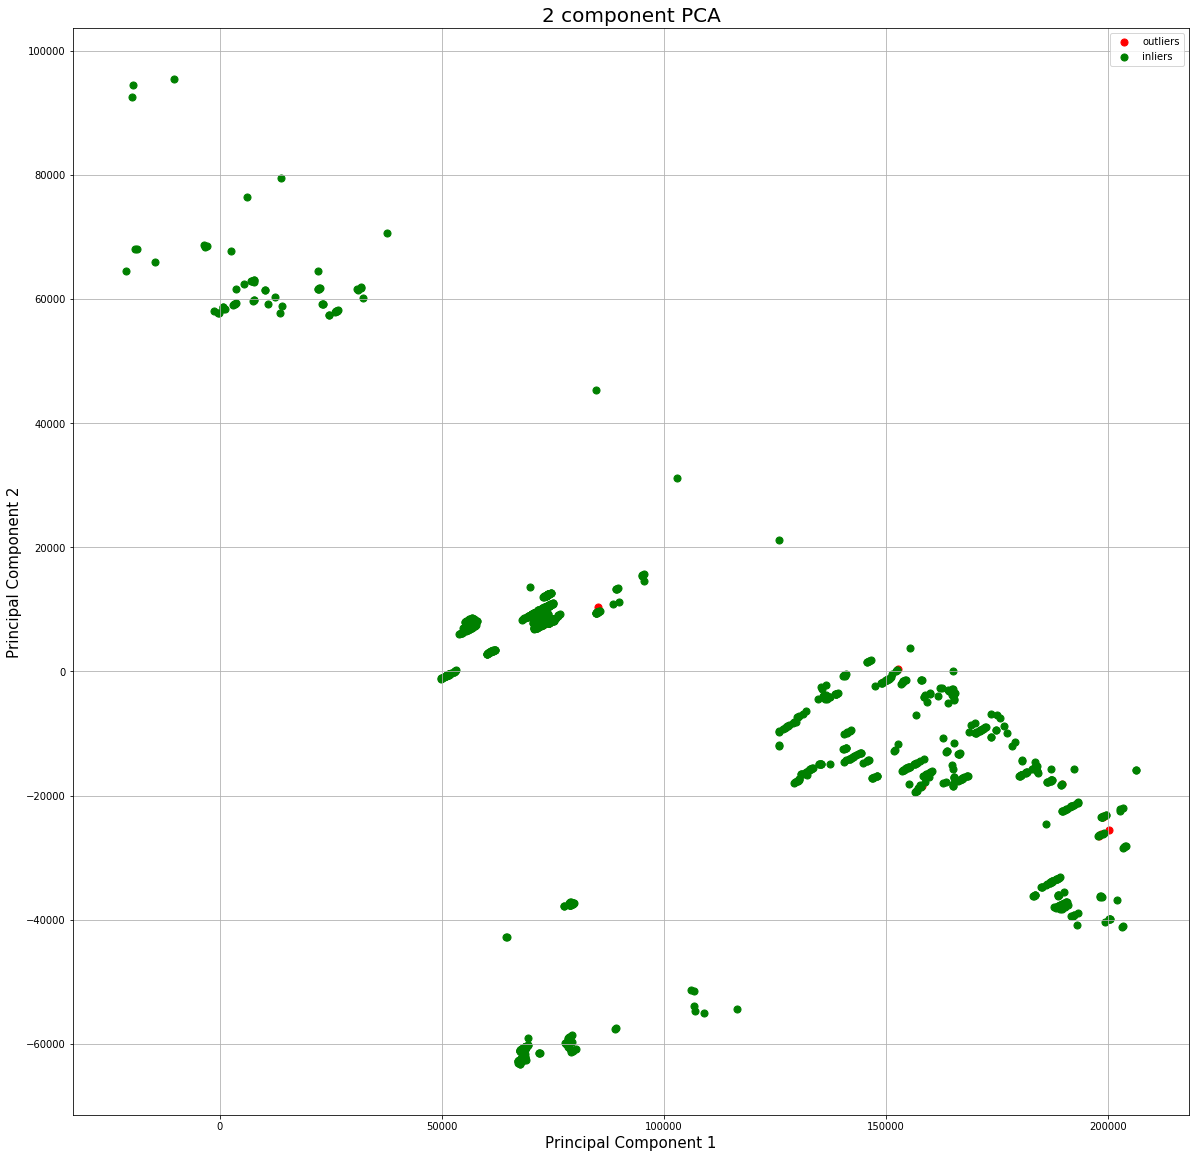

In [1158]:
finalDf = pd.concat([principalDf, temp[['target']]], axis = 1)
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['outliers', 'inliers']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [1159]:
data = pd.concat([outliers3, inliers3])

In [1160]:
data = data.sort_index()

ZeroDivisionError: float division by zero

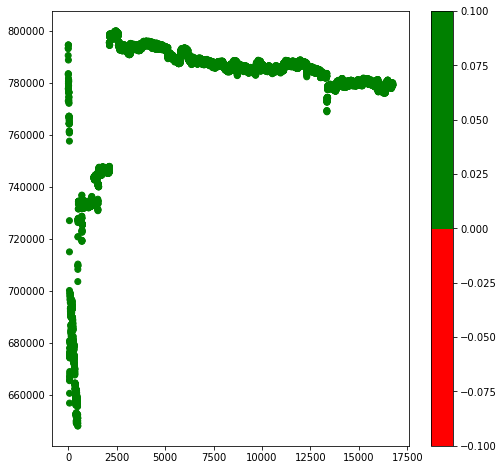

In [1162]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

y = data.iloc[:,0]
x = range(len(data))
label = data.iloc[:,-1] == 'inliers'
colors = ['red','green']

fig = plt.figure(figsize=(8,8))
plt.scatter(x, y, c=label, cmap=matplotlib.colors.ListedColormap(colors))

cb = plt.colorbar()
loc = np.arange(0,max(label),max(label)/float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels(colors)

In [1094]:
outliers3.sort_index()

,0,1,2,3,4,5,k distances,local outlier factor,target
151,755016,337676,19.944600,0.000000,417340,795532,655.891171,79.866645,outliers
165,755836,337180,21.505377,0.268817,418656,794712,48.498202,11.042036,outliers
309,743484,335784,18.232044,0.000000,407700,807064,161.152822,54.576440,outliers
337,743500,335636,19.780220,0.000000,407864,807048,135.233143,44.842766,outliers
383,756188,363840,19.680851,0.000000,392348,794360,131.636129,22.033880,outliers
404,756492,356976,23.369566,0.271739,399640,794056,118.466588,30.056625,outliers
405,756456,356860,22.788204,0.000000,399596,794092,90.071356,21.430297,outliers
411,756592,356488,19.283747,0.000000,400104,793956,600.360257,176.450251,outliers
412,757280,357184,23.636364,0.000000,400096,793268,109.039134,10.994281,outliers
417,757124,357020,25.252525,0.000000,400104,793424,161.755102,5.645271,outliers


In [962]:
raw_data.head(1)

,Total CPU usage (%),AnotherMonitor Memory (kB),Memory used (kB),Memory available (MemFree+Cached) (kB),MemFree (kB),Cached (kB),mycpu
0,8.35443,3544,483188,1067360,336596,730764,6.329114


In [963]:
data.head()

,0,1,2,3,4,5,k distances,local outlier factor,target
0,1067360,336596,8.354430,6.329114,730764,483188,931.974725,-1.851142,inliers
1,1066112,335240,3.022670,1.259446,730872,484436,214.779618,-2.114959,inliers
2,1066864,335992,2.295918,1.020408,730872,483684,41.582707,-2.131088,inliers
3,1066840,335968,1.269036,0.761421,730872,483708,41.582707,-2.131088,inliers
4,1066492,335620,1.518987,1.012658,730872,484056,602.753785,-2.131088,inliers


## CNN

In [964]:
def flat(l):
    for k in l:
        if not isinstance(k, (list, tuple)):
            yield k
        else:
            yield from flat(k)

In [965]:
def new_cpu_data_generation(data, label):
    df = []
    y = []
    for k in range(len(data)-80):
        temp = []
        score = 0
        for i in range(80):
            temp.extend(data.iloc[i+k])
            score += label[i+k]
        df.append(temp)
        y.append(score)
    return df,y

In [966]:
range(len(data)-80)

range(0, 20102)

In [967]:
labels = data['target']

In [968]:
a = labels =='outliers'

In [969]:
df, y = new_cpu_data_generation(data.iloc[:,0:6], a)

In [991]:
label = [] 
for i in y:
    if i > 5:
        label.append(1)
    else:
        label.append(0)

In [992]:
df = pd.DataFrame(df)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,470,471,472,473,474,475,476,477,478,479
0,1067360.0,336596.0,8.354430,6.329114,730764.0,483188.0,1066112.0,335240.0,3.022670,1.259446,...,1.763224,1.259446,745152.0,488100.0,1062392.0,317180.0,0.506329,0.759494,745212.0,488156.0
1,1066112.0,335240.0,3.022670,1.259446,730872.0,484436.0,1066864.0,335992.0,2.295918,1.020408,...,0.506329,0.759494,745212.0,488156.0,1062460.0,317248.0,0.765306,0.765306,745212.0,488088.0
2,1066864.0,335992.0,2.295918,1.020408,730872.0,483684.0,1066840.0,335968.0,1.269036,0.761421,...,0.765306,0.765306,745212.0,488088.0,1062516.0,317304.0,1.262626,1.010101,745212.0,488032.0
3,1066840.0,335968.0,1.269036,0.761421,730872.0,483708.0,1066492.0,335620.0,1.518987,1.012658,...,1.262626,1.010101,745212.0,488032.0,1063744.0,318532.0,1.750000,1.250000,745212.0,486804.0
4,1066492.0,335620.0,1.518987,1.012658,730872.0,484056.0,1065988.0,335116.0,1.511335,1.259446,...,1.750000,1.250000,745212.0,486804.0,1063880.0,318668.0,1.507538,1.005025,745212.0,486668.0


In [1006]:
class_weights = {0: sum(pd.get_dummies(label).iloc[:,0]==0),1:sum(pd.get_dummies(label).iloc[:,0]==1)}

In [1025]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape, GlobalAveragePooling1D
from keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D
from keras.utils import np_utils
TIME_PERIODS = 80
num_sensors = 6
input_shape = 80*6
num_classes= 2

In [1026]:
model_m = Sequential()
model_m.add(Reshape((TIME_PERIODS, num_sensors), input_shape=(input_shape,)))
model_m.add(Conv1D(100, 10, activation='relu'))
model_m.add(MaxPooling1D(3))
model_m.add(Conv1D(160, 10, activation='relu'))
model_m.add(Conv1D(160, 10, activation='relu'))
model_m.add(GlobalAveragePooling1D())
model_m.add(Dropout(0.5))
model_m.add(Dense(num_classes, activation='softmax'))
print(model_m.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_42 (Reshape)         (None, 80, 6)             0         
_________________________________________________________________
conv1d_118 (Conv1D)          (None, 71, 100)           6100      
_________________________________________________________________
max_pooling1d_36 (MaxPooling (None, 23, 100)           0         
_________________________________________________________________
conv1d_119 (Conv1D)          (None, 14, 160)           160160    
_________________________________________________________________
conv1d_120 (Conv1D)          (None, 5, 160)            256160    
_________________________________________________________________
global_average_pooling1d_24  (None, 160)               0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 160)               0         
__________

In [1027]:
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='best_model.{epoch:02d}-{val_loss:.2f}.h5',
        monitor='val_loss', save_best_only=True),
    keras.callbacks.EarlyStopping(monitor='acc', patience=1)
]

model_m.compile(loss='categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])

BATCH_SIZE = 320
EPOCHS = 10

history = model_m.fit(df,
                      pd.get_dummies(label),
                      batch_size=BATCH_SIZE,
                      epochs=EPOCHS,
                      callbacks=callbacks_list,
                      validation_split=0.2,
                      verbose=1)#, class_weight = class_weights )


Train on 16081 samples, validate on 4021 samples
Epoch 1/10
16081/16081 [==============================] - 8s 478us/step - loss: 6.9997 - acc: 0.5657 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 2/10
16081/16081 [==============================] - 4s 229us/step - loss: 0.3428 - acc: 0.9787 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 3/10
16081/16081 [==============================] - 4s 227us/step - loss: 0.3418 - acc: 0.9788 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 4/10
16081/16081 [==============================] - 4s 229us/step - loss: 0.3398 - acc: 0.9789 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 5/10
16081/16081 [==============================] - 4s 233us/step - loss: 0.3378 - acc: 0.9790 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6/10
16081/16081 [==============================] - 4s 229us/step - loss: 0.3398 - acc: 0.9789 - val_loss: 1.1921e-07 - val_acc: 1.0000


In [1028]:
model_m.evaluate(df,pd.get_dummies(label))

20102/20102 [==============================] - 3s 132us/step


[0.257382893619247, 0.9840314396577455]

In [1021]:
sum(y_pred)

194

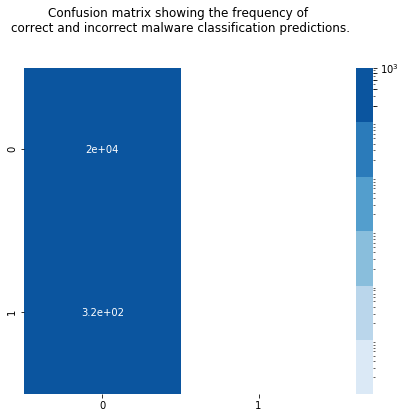

In [1029]:
y_pred = model_m.predict_classes(df)
confusion_matrix = pd.DataFrame(
    data=metrics.confusion_matrix(label, y_pred), 
)
confusion_figure, confusion_axes = matplotlib.pyplot.subplots()
confusion_figure.set_size_inches(7, 6)
confusion_axes.set_title(
    'Confusion matrix showing the frequency of \n'
    'correct and incorrect malware classification predictions.'
    '\n\n'  # hack to avoid overlap with x-axis labels below
)
sns.heatmap(confusion_matrix, cmap=sns.color_palette("Blues"),annot=True,norm=LogNorm(confusion_matrix.min().min(),confusion_matrix.max().max()),
            vmin = 0.001, vmax=1000)

In [1030]:
from sklearn.metrics import classification_report

target_names = ['normal', 'malware']
print(classification_report(label, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      normal       0.98      1.00      0.99     19781
     malware       0.00      0.00      0.00       321

   micro avg       0.98      0.98      0.98     20102
   macro avg       0.49      0.50      0.50     20102
weighted avg       0.97      0.98      0.98     20102



/Users/xihajun/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/xihajun/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/xihajun/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## test

In [338]:
raw_data = all_data

## autoencoder

In [201]:
from sklearn import preprocessing #标准化数据模块
import numpy as np

In [120]:
temp = raw_data

In [97]:
raw_data = raw_data[50:-1]

In [155]:
np.std(raw_data)

Total CPU usage (%)                           9.884599
SeraphimDroid Memory (kB)                     0.000000
Memory used (kB)                          81390.244549
Memory available (MemFree+Cached) (kB)    81390.244549
MemFree (kB)                              19581.212519
Cached (kB)                               75832.214062
mycpu                                         0.697867
dtype: float64

In [ ]:
Total CPU usage (%)                            6.367253f
SeraphimDroid Memory (kB)                  39376.000000f
Memory used (kB)                          690447.355969f
Memory available (MemFree+Cached) (kB)    860100.644031f
MemFree (kB)                              339839.719606f
Cached (kB)                               520277.660460f
mycpu                                          1.119867f

In [131]:
 2.0,1.0,38240,,482180,1068368,335876,732492,147456

SyntaxError: invalid syntax (<ipython-input-131-844093b610ca>, line 1)

In [202]:
np.mean(raw_data)

Total CPU usage (%)                           15.365218
SeraphimDroid Memory (kB)                  39948.000000
Memory used (kB)                          841690.731439
Memory available (MemFree+Cached) (kB)    708857.268561
MemFree (kB)                              314519.490376
Cached (kB)                               394347.090742
mycpu                                          0.291808
dtype: float64

In [203]:
temp = (raw_data -np.mean(raw_data))/np.std(raw_data)
raw_data = np.array(temp.drop(['SeraphimDroid Memory (kB)'],axis = 1))

In [204]:
temp.head()

,Total CPU usage (%),SeraphimDroid Memory (kB),Memory used (kB),Memory available (MemFree+Cached) (kB),MemFree (kB),Cached (kB),mycpu
0,-0.536178,NaN,-3.345468,3.345468,-0.388767,3.317463,2.129617
1,-0.529320,NaN,-3.343353,3.343353,-0.459213,3.330854,1.152541
2,-0.155886,NaN,-3.471366,3.471366,-0.042923,3.365002,0.576133
3,-0.593491,NaN,-3.545725,3.545725,0.272976,3.367637,-0.046633
4,0.287288,NaN,-3.534760,3.534760,-0.135705,3.444915,-0.051204


In [205]:
raw_data =  np.array(raw_data)

In [42]:
raw_data = preprocessing.scale(raw_data)

In [43]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras import regularizers

input_dim = 6
encoding_dim = 20
num_epoch = 20
batch_size = 32

input_layer = Input(shape=(input_dim, ), name="input")
encoder = Dense(encoding_dim, activation="tanh", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu',name="output")(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['mae'])
checkpointer = ModelCheckpoint(filepath="SofaSofa_model.h5",
                               verbose=0,
                               save_best_only=True)
history = autoencoder.fit(raw_data, raw_data,
                          epochs=num_epoch,
                          batch_size=batch_size,
                          shuffle=True,
                          validation_data=(raw_data, raw_data),
                          verbose=1).history

Train on 388 samples, validate on 388 samples
Epoch 1/20
388/388 [==============================] - 1s 1ms/step - loss: 0.1586 - mean_absolute_error: 0.0879 - val_loss: 0.1558 - val_mean_absolute_error: 0.0794
Epoch 2/20
388/388 [==============================] - 0s 48us/step - loss: 0.1542 - mean_absolute_error: 0.0760 - val_loss: 0.1523 - val_mean_absolute_error: 0.0730
Epoch 3/20
388/388 [==============================] - 0s 47us/step - loss: 0.1509 - mean_absolute_error: 0.0716 - val_loss: 0.1488 - val_mean_absolute_error: 0.0699
Epoch 4/20
388/388 [==============================] - 0s 45us/step - loss: 0.1472 - mean_absolute_error: 0.0687 - val_loss: 0.1451 - val_mean_absolute_error: 0.0670
Epoch 5/20
388/388 [==============================] - 0s 51us/step - loss: 0.1433 - mean_absolute_error: 0.0655 - val_loss: 0.1411 - val_mean_absolute_error: 0.0634
Epoch 6/20
388/388 [==============================] - 0s 43us/step - loss: 0.1393 - mean_absolute_error: 0.0619 - val_loss: 0.1368

In [ ]:
autoencoder.summary()

In [144]:
autoencoder.save('autoencoder.h5')   # HDF5 file, you have to pip3 install h5py if don't have it


In [53]:
test = np.array([np.array([-0.49668807,-13.51192,13.51192,1.0840404,20.146849,-1.8035128]),np.array([-0.49668807,-13.51192,13.51192,1.0840404,20.146849,-1.8035128])])

In [48]:
raw_data[0]

array([ 0.77358041, -0.49998431,  0.49998431, -2.48784204,  3.56661054,
        1.06719509])

In [54]:
test

array([[ -0.49668807, -13.51192   ,  13.51192   ,   1.0840404 ,
         20.146849  ,  -1.8035128 ],
       [ -0.49668807, -13.51192   ,  13.51192   ,   1.0840404 ,
         20.146849  ,  -1.8035128 ]])

In [104]:
autoencoder.predict(test)

array([[3.0588593 , 0.        , 0.92098784, 0.81648844, 2.178236  ,
        0.        ],
       [3.0588593 , 0.        , 0.92098784, 0.81648844, 2.178236  ,
        0.        ]], dtype=float32)

In [ ]:
import tensorflow as tf
from tensorflow.python.platform import gfile
GRAPH_PB_PATH = 'tensorflow_model/autoencoder.pb'
with tf.Session() as sess:
    print("load graph")
    with gfile.FastGFile(GRAPH_PB_PATH,'rb') as f:
        graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
    sess.graph.as_default()
    tf.import_graph_def(graph_def, name='')
    graph_nodes=[n for n in graph_def.node]
    names = []
    for t in graph_nodes:
        names.append(t.name)
    print(names)

In [ ]:
 3.7128713,1.4851485,37800,,462864,1087684,342144,745540,147456
    3.7128713
    462864.0
    1087684.0
    342144.0
    745540.0
    1.4851485
    Output:0.16344601
    Output:0.0
    Output:1.7796029
    Output:0.0
    Output:4.7323923
    Output:0.0
        
    input:0.0019196428
    input:-13.451964
    input:13.451964
    input:-0.07408767
    input:21.34465
    input:-1.3713676
        
        Total CPU usage (%)                   3.962832
SeraphimDroid Memory (kB)                     0.000000
Memory used (kB)                          22950.313937
Memory available (MemFree+Cached) (kB)    22950.313937
MemFree (kB)                              16205.462286
Cached (kB)                               14519.936550
mycpu                                         0.565675


Total CPU usage (%)                            3.705264
SeraphimDroid Memory (kB)                  37568.000000
Memory used (kB)                          771590.796872
Memory available (MemFree+Cached) (kB)    778957.203128
MemFree (kB)                              343344.630335
Cached (kB)                               435617.041246

In [206]:
pred_test = autoencoder.predict(raw_data)

In [46]:
from scipy.spatial import distance

dst = distance.euclidean(raw_data[1], pred_test[1])

In [139]:
dst = distance.euclidean(raw_data[1], pred_test[1])

In [207]:
dst = []
for i in range(len(raw_data)):
    dst.append(distance.euclidean(raw_data[i], pred_test[i]))

In [48]:
dst = np.array(dst)/max(dst)

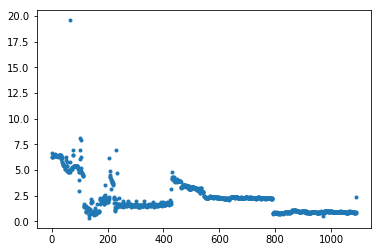

In [208]:
plt.plot(dst,'.')

In [1177]:
index = []
for i in range(len(dst)):
    if dst[i]>0.5:
        index.append(i)


In [1337]:
index

[44, 45, 48, 49, 477, 478, 2105, 3112, 3412, 10550, 10610, 10670]

In [1386]:
data = pd.DataFrame(raw_data)

In [1387]:
data['label'] = 0
data['label'].iloc[index] = 1

/Users/xihajun/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [1388]:
sum(data['label'])

14

In [1389]:
pred_test[0]

array([0.8606161 , 0.        , 0.        , 0.31439883, 0.        ,
       3.1587079 , 0.8183838 ], dtype=float32)

In [1390]:
from sklearn.model_selection import train_test_split

#labels= label.values.ravel() # this becomes a 'horizontal' array
# Use small numbers for slow classifiers, as KNN, Radius, SVC,...
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:,0:55], data['label'], train_size=0.8, test_size=0.2)
print("X_train, y_train:", x_train.shape, y_train.shape)
print("X_test, y_test:", x_test.shape, y_test.shape)

X_train, y_train: (13402, 8) (13402,)
X_test, y_test: (3351, 8) (3351,)


## random forest

In [1391]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_jobs=-1, random_state=30, n_estimators=102)
trained_model= clf.fit(x_train, y_train)

In [1392]:
y_pred = clf.predict(x_test)

In [1393]:
print("Accuracy" + str((y_test == y_pred).sum()/x_test.shape[0]))

Accuracy1.0


Score:  1.0


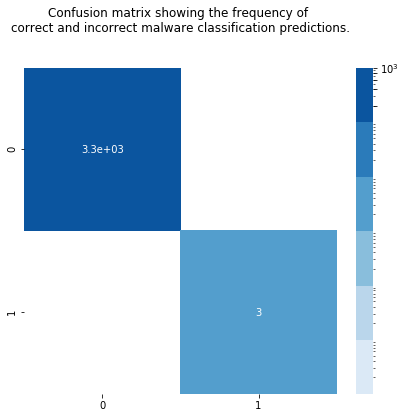

In [1394]:
print("Score: ", trained_model.score(x_train, y_train))
confusion_matrix = pd.DataFrame(
    data=metrics.confusion_matrix(y_test, y_pred), 
)
confusion_figure, confusion_axes = matplotlib.pyplot.subplots()
confusion_figure.set_size_inches(7, 6)
confusion_axes.set_title(
    'Confusion matrix showing the frequency of \n'
    'correct and incorrect malware classification predictions.'
    '\n\n'  # hack to avoid overlap with x-axis labels below
)
sns.heatmap(confusion_matrix, cmap=sns.color_palette("Blues"),annot=True,norm=LogNorm(confusion_matrix.min().min(),confusion_matrix.max().max()),
            vmin = 0.001, vmax=1000)

In [1395]:
from sklearn.metrics import classification_report

target_names = ['normal', 'malware']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      normal       1.00      1.00      1.00      3348
     malware       1.00      1.00      1.00         3

   micro avg       1.00      1.00      1.00      3351
   macro avg       1.00      1.00      1.00      3351
weighted avg       1.00      1.00      1.00      3351



## SVM

In [1396]:
from sklearn import svm
clf = svm.SVC(gamma='scale')
clf.fit(x_train, y_train)  

y_pred_svm = clf.predict(x_test)

print("Number of mislabeled points out of a total %d points : %d"
       % (x_test.shape[0],(y_test != y_pred_svm).sum()))
print("Accuracy" + str((y_test != y_pred_svm).sum()/x_test.shape[0]))

Number of mislabeled points out of a total 3351 points : 3
Accuracy0.0008952551477170994


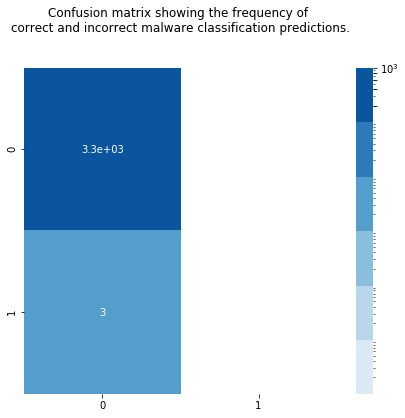

In [1397]:
confusion_matrix = pd.DataFrame(
    data=metrics.confusion_matrix(y_test, y_pred_svm), 
)
confusion_figure, confusion_axes = matplotlib.pyplot.subplots()
confusion_figure.set_size_inches(7, 6)
confusion_axes.set_title(
    'Confusion matrix showing the frequency of \n'
    'correct and incorrect malware classification predictions.'
    '\n\n'  # hack to avoid overlap with x-axis labels below
)
sns.heatmap(confusion_matrix, cmap=sns.color_palette("Blues"),annot=True,norm=LogNorm(confusion_matrix.min().min(),confusion_matrix.max().max()),
            vmin = 0.001, vmax=1000)

In [1398]:
from sklearn.metrics import classification_report

target_names = ['normal', 'malware']
print(classification_report(y_test, y_pred_svm, target_names=target_names))

              precision    recall  f1-score   support

      normal       1.00      1.00      1.00      3348
     malware       0.00      0.00      0.00         3

   micro avg       1.00      1.00      1.00      3351
   macro avg       0.50      0.50      0.50      3351
weighted avg       1.00      1.00      1.00      3351



/Users/xihajun/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/xihajun/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/xihajun/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Naive Bayes¶

In [1399]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test)

print("Number of mislabeled points out of a total %d points : %d"
       % (x_test.shape[0],(y_test != y_pred).sum()))
print("Accuracy " + str(1- (y_test != y_pred).sum()/x_test.shape[0]))

Number of mislabeled points out of a total 3351 points : 0
Accuracy 1.0


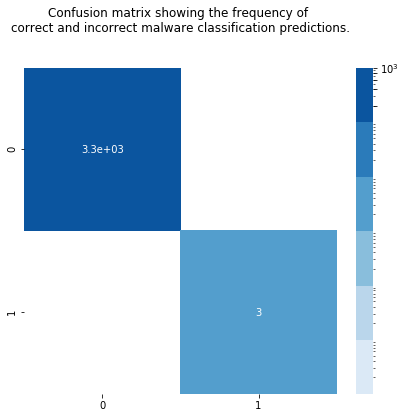

In [1400]:
confusion_matrix = pd.DataFrame(
    data=metrics.confusion_matrix(y_test, y_pred), 
)
confusion_figure, confusion_axes = matplotlib.pyplot.subplots()
confusion_figure.set_size_inches(7, 6)
confusion_axes.set_title(
    'Confusion matrix showing the frequency of \n'
    'correct and incorrect malware classification predictions.'
    '\n\n'  # hack to avoid overlap with x-axis labels below
)
sns.heatmap(confusion_matrix, cmap=sns.color_palette("Blues"),annot=True,norm=LogNorm(confusion_matrix.min().min(),confusion_matrix.max().max()),
            vmin = 0.001, vmax=1000)

In [1401]:
from sklearn.metrics import classification_report

target_names = ['normal', 'malware']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      normal       1.00      1.00      1.00      3348
     malware       1.00      1.00      1.00         3

   micro avg       1.00      1.00      1.00      3351
   macro avg       1.00      1.00      1.00      3351
weighted avg       1.00      1.00      1.00      3351



## KNN

In [1402]:
from sklearn.neighbors import KNeighborsClassifier 

knn = KNeighborsClassifier(n_neighbors=3,weights = 'distance')
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='distance')

In [1403]:
score=knn.score(x_test,y_test)
y_pred = knn.predict(x_test)
score

0.9994031632348552

In [1404]:
metrics.recall_score(y_test, y_pred, average='micro')

0.9994031632348552

In [1405]:
from sklearn.metrics import classification_report

target_names = ['normal', 'malware']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      normal       1.00      1.00      1.00      3348
     malware       1.00      0.33      0.50         3

   micro avg       1.00      1.00      1.00      3351
   macro avg       1.00      0.67      0.75      3351
weighted avg       1.00      1.00      1.00      3351



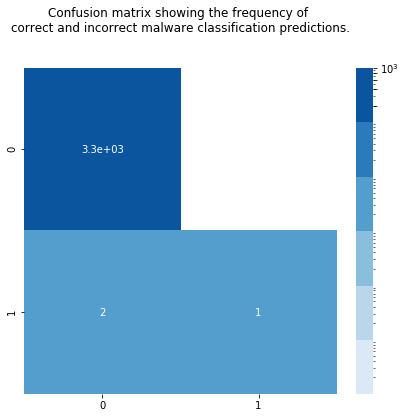

In [1406]:
confusion_matrix = pd.DataFrame(
    data=metrics.confusion_matrix(y_test, y_pred), 
)
confusion_figure, confusion_axes = matplotlib.pyplot.subplots()
confusion_figure.set_size_inches(7, 6)
confusion_axes.set_title(
    'Confusion matrix showing the frequency of \n'
    'correct and incorrect malware classification predictions.'
    '\n\n'  # hack to avoid overlap with x-axis labels below
)
sns.heatmap(confusion_matrix, cmap=sns.color_palette("Blues"),annot=True,norm=LogNorm(confusion_matrix.min().min(),confusion_matrix.max().max()),
            vmin = 0.001, vmax=1000)

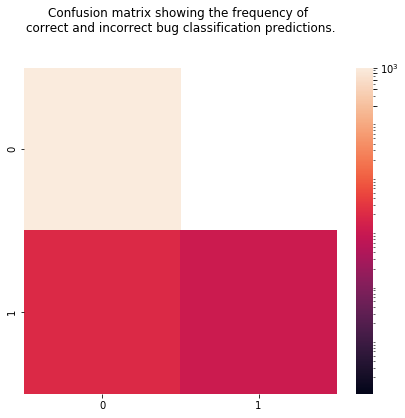

In [1407]:
confusion_matrix = pd.DataFrame(
    data=metrics.confusion_matrix(y_test, y_pred), 
)
confusion_figure, confusion_axes = matplotlib.pyplot.subplots()
confusion_figure.set_size_inches(7, 6)
confusion_axes.set_title(
    'Confusion matrix showing the frequency of \n'
    'correct and incorrect bug classification predictions.'
    '\n\n'  # hack to avoid overlap with x-axis labels below
)
sns.heatmap(confusion_matrix, norm=LogNorm(confusion_matrix.min().min(),confusion_matrix.max().max()),
            vmin = 0.001, vmax=1000)

## Neural network

In [1408]:
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import RMSprop, Adadelta, Adam
base_model = Sequential()
base_model.add(Dense(55, input_dim=x_train.shape[1], activation='sigmoid'))
base_model.add(Dense(55, activation='sigmoid'))
base_model.add(Dense(units=pd.get_dummies(y_train).shape[1], activation='softmax'))


In [1409]:
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_96 (Dense)             (None, 55)                495       
_________________________________________________________________
dense_97 (Dense)             (None, 55)                3080      
_________________________________________________________________
dense_98 (Dense)             (None, 2)                 112       
Total params: 3,687
Trainable params: 3,687
Non-trainable params: 0
_________________________________________________________________


In [1410]:
base_model.compile(optimizer=Adadelta(), loss='categorical_crossentropy', metrics=['categorical_accuracy'])
base_model.fit(x_train, pd.get_dummies(y_train), epochs=20, batch_size=64)

Epoch 1/20
13402/13402 [==============================] - 4s 314us/step - loss: 0.0382 - categorical_accuracy: 0.9992
Epoch 2/20
13402/13402 [==============================] - 0s 33us/step - loss: 0.0066 - categorical_accuracy: 0.9992
Epoch 3/20
13402/13402 [==============================] - 0s 33us/step - loss: 0.0064 - categorical_accuracy: 0.9992
Epoch 4/20
13402/13402 [==============================] - 0s 33us/step - loss: 0.0063 - categorical_accuracy: 0.9992
Epoch 5/20
13402/13402 [==============================] - 0s 31us/step - loss: 0.0062 - categorical_accuracy: 0.9992
Epoch 6/20
13402/13402 [==============================] - 0s 32us/step - loss: 0.0061 - categorical_accuracy: 0.9992
Epoch 7/20
13402/13402 [==============================] - 0s 33us/step - loss: 0.0060 - categorical_accuracy: 0.9992
Epoch 8/20
13402/13402 [==============================] - 0s 33us/step - loss: 0.0061 - categorical_accuracy: 0.9992
Epoch 9/20
13402/13402 [==============================] - 0s 33

In [1411]:
base_model.evaluate(x_test,pd.get_dummies(y_test))

3351/3351 [==============================] - 2s 497us/step


[0.005482982032385804, 0.999104744852283]

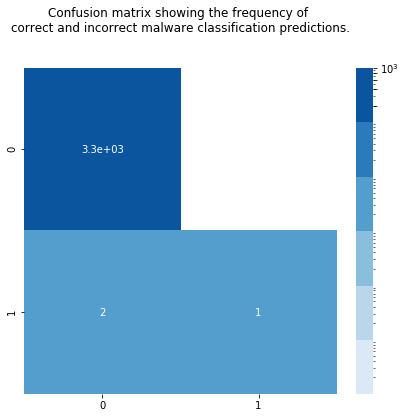

In [1412]:
confusion_matrix = pd.DataFrame(
    data=metrics.confusion_matrix(y_test, y_pred), 
)
confusion_figure, confusion_axes = matplotlib.pyplot.subplots()
confusion_figure.set_size_inches(7, 6)
confusion_axes.set_title(
    'Confusion matrix showing the frequency of \n'
    'correct and incorrect malware classification predictions.'
    '\n\n'  # hack to avoid overlap with x-axis labels below
)
sns.heatmap(confusion_matrix, cmap=sns.color_palette("Blues"),annot=True,norm=LogNorm(confusion_matrix.min().min(),confusion_matrix.max().max()),
            vmin = 0.001, vmax=1000)

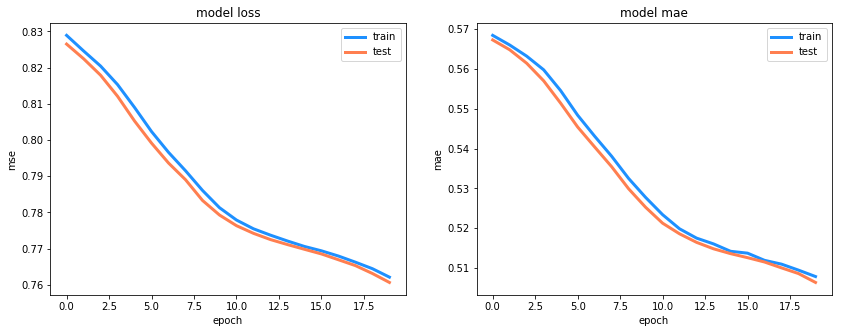

In [607]:
plt.figure(figsize=(14, 5))
plt.subplot(121)
plt.plot(history['loss'], c='dodgerblue', lw=3)
plt.plot(history['val_loss'], c='coral', lw=3)
plt.title('model loss')
plt.ylabel('mse'); plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.subplot(122)
plt.plot(history['mean_absolute_error'], c='dodgerblue', lw=3)
plt.plot(history['val_mean_absolute_error'], c='coral', lw=3)
plt.title('model mae')
plt.ylabel('mae'); plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [179]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(novelty=True)
lof.fit(raw_data)

/Users/xihajun/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


LocalOutlierFactor(algorithm='auto', contamination='legacy', leaf_size=30,
          metric='minkowski', metric_params=None, n_jobs=None,
          n_neighbors=20, novelty=True, p=2)

In [180]:
from scipy import stats
scores_pred = lof.negative_outlier_factor_

threshold = stats.scoreatpercentile(scores_pred, 100 * 0.1)  # 根据异常样本比例，得到阈值，用于绘图
 
# plot the level sets of the decision function
xx, yy = np.meshgrid(np.linspace(-7, 7, 50), np.linspace(-7, 7, 50))
Z = clf._decision_function(np.c_[xx.ravel(), yy.ravel()])  # 类似scores_pred的值，值越小越有可能是异常点
Z = Z.reshape(xx.shape)
 
plt.title("Local Outlier Factor (LOF)")
# plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7), cmap=plt.cm.Blues_r)  # 绘制异常点区域，值从最小的到阈值的那部分
a = plt.contour(xx, yy, Z, levels=[threshold], linewidths=2, colors='red')  # 绘制异常点区域和正常点区域的边界
plt.contourf(xx, yy, Z, levels=[threshold, Z.max()], colors='palevioletred')  # 绘制正常点区域，值从阈值到最大的那部分
 
b = plt.scatter(X_train[:-n_outliers, 0], X_train[:-n_outliers, 1], c='white',
                    s=20, edgecolor='k')
c = plt.scatter(X_train[-n_outliers:, 0], X_train[-n_outliers:, 1], c='black',

                    s=20, edgecolor='k')
plt.axis('tight')
plt.xlim((-7, 7))
plt.ylim((-7, 7))
plt.legend([a.collections[0], b, c],
           ['learned decision function', 'true inliers', 'true outliers'],
           loc="upper left")
plt.show()

/Users/xihajun/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


NameError: name 'clf' is not defined

# Machine learning

In [2]:
import pandas as pd
import numpy as np
from matplotlib.colors import LogNorm
import seaborn as sns
from sklearn import metrics
import matplotlib



In [3]:
# data = pd.read_csv("../data/collected/networkmonitor314.csv")

In [4]:
data = pd.read_csv("../data/collected/networkmonitor-mal.csv")

In [5]:
data.head()

,Timestamp,Socket Connection Test,HTTP Connection Test,Network Type,Mobile Data Network Type,SIM State,Service State,Detailed State,Is Connected,Is Roaming,...,LTE Cell Id,LTE Cell RF Channel,LTE Physical Cell Id,LTE Cell Tracking Area Code,Network Interface,IPv4 Address,IPv6 Address,Battery Level,Download Speed (Mbps),Upload Speed (Mbps)
0,2019-07-07 15:18:29,FAIL,FAIL,MOBILE/LTE,LTE,READY,IN_SERVICE,CONNECTED,1,0,...,NaN,NaN,NaN,NaN,eth0,10.0.2.15,fec0::5054:ff:fe12:3456;fe80::5054:ff:fe12:345...,100,Disabled,Disabled
1,2019-07-07 15:18:19,FAIL,FAIL,MOBILE/LTE,LTE,READY,IN_SERVICE,CONNECTED,1,0,...,NaN,NaN,NaN,NaN,eth0,10.0.2.15,fec0::5054:ff:fe12:3456;fe80::5054:ff:fe12:345...,100,Disabled,Disabled
2,2019-07-07 15:18:08,FAIL,FAIL,MOBILE/LTE,LTE,READY,IN_SERVICE,CONNECTED,1,0,...,NaN,NaN,NaN,NaN,eth0,10.0.2.15,fec0::5054:ff:fe12:3456;fe80::5054:ff:fe12:345...,100,Disabled,Disabled
3,2019-07-07 15:17:57,FAIL,FAIL,MOBILE/LTE,LTE,READY,IN_SERVICE,CONNECTED,1,0,...,NaN,NaN,NaN,NaN,eth0,10.0.2.15,fec0::5054:ff:fe12:3456;fe80::5054:ff:fe12:345...,100,Disabled,Disabled
4,2019-07-07 15:17:47,FAIL,FAIL,MOBILE/LTE,LTE,READY,IN_SERVICE,CONNECTED,1,0,...,NaN,NaN,NaN,NaN,eth0,10.0.2.15,fec0::5054:ff:fe12:3456;fe80::5054:ff:fe12:345...,100,Disabled,Disabled


In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
le = LabelEncoder()
hot = OneHotEncoder(sparse=True, handle_unknown='ignore')
def categorical_converter(data):
    '''manually encode the three categorical columns into ordinals'''
    cols=['Socket Connection Test','HTTP Connection Test','Network Type','Mobile Data Network Type','SIM State','Service State','Detailed State','Network Interface','IPv4 Address','IPv6 Address','Download Speed (Mbps)','Upload Speed (Mbps)']
    for i in cols:
        data[i] = le.fit_transform(data[i])
    data = hot.fit_transform(data.loc[:,cols])

In [7]:
data['label'] = 'mal'
all_data = data

In [8]:
data = pd.read_csv("../data/collected/youtube.csv")

In [9]:
data['label'] = 'youtube'

In [10]:
all_data = pd.concat([all_data, data])

In [11]:
data =  pd.read_csv("../data/collected/networkmonitor-3.csv")
#data = data[0:300]
data['label'] = 'normal'

In [12]:
data.head(10)

,Timestamp,Socket Connection Test,HTTP Connection Test,Network Type,Mobile Data Network Type,SIM State,Service State,Detailed State,Is Connected,Is Roaming,...,LTE Cell RF Channel,LTE Physical Cell Id,LTE Cell Tracking Area Code,Network Interface,IPv4 Address,IPv6 Address,Battery Level,Download Speed (Mbps),Upload Speed (Mbps),label
0,2019-07-04 12:57:28,FAIL,FAIL,MOBILE/LTE,LTE,READY,IN_SERVICE,CONNECTED,1,0,...,NaN,NaN,NaN,eth0,10.0.2.15,fec0::5054:ff:fe12:3456;fe80::5054:ff:fe12:345...,100,Disabled,Disabled,normal
1,2019-07-04 12:57:18,FAIL,FAIL,MOBILE/LTE,LTE,READY,IN_SERVICE,CONNECTED,1,0,...,NaN,NaN,NaN,eth0,10.0.2.15,fec0::5054:ff:fe12:3456;fe80::5054:ff:fe12:345...,100,Disabled,Disabled,normal
2,2019-07-04 12:57:08,FAIL,FAIL,MOBILE/LTE,LTE,READY,IN_SERVICE,CONNECTED,1,0,...,NaN,NaN,NaN,eth0,10.0.2.15,fec0::5054:ff:fe12:3456;fe80::5054:ff:fe12:345...,100,Disabled,Disabled,normal
3,2019-07-04 12:56:58,FAIL,FAIL,MOBILE/LTE,LTE,READY,IN_SERVICE,CONNECTED,1,0,...,NaN,NaN,NaN,eth0,10.0.2.15,fec0::5054:ff:fe12:3456;fe80::5054:ff:fe12:345...,100,Disabled,Disabled,normal
4,2019-07-04 12:56:48,FAIL,FAIL,MOBILE/LTE,LTE,READY,IN_SERVICE,CONNECTED,1,0,...,NaN,NaN,NaN,eth0,10.0.2.15,fec0::5054:ff:fe12:3456;fe80::5054:ff:fe12:345...,100,Disabled,Disabled,normal
5,2019-07-04 12:56:38,FAIL,FAIL,MOBILE/LTE,LTE,READY,IN_SERVICE,CONNECTED,1,0,...,NaN,NaN,NaN,eth0,10.0.2.15,fec0::5054:ff:fe12:3456;fe80::5054:ff:fe12:345...,100,Disabled,Disabled,normal
6,2019-07-04 12:56:28,FAIL,FAIL,MOBILE/LTE,LTE,READY,IN_SERVICE,CONNECTED,1,0,...,NaN,NaN,NaN,eth0,10.0.2.15,fec0::5054:ff:fe12:3456;fe80::5054:ff:fe12:345...,100,Disabled,Disabled,normal
7,2019-07-04 12:56:18,FAIL,FAIL,MOBILE/LTE,LTE,READY,IN_SERVICE,CONNECTED,1,0,...,NaN,NaN,NaN,eth0,10.0.2.15,fec0::5054:ff:fe12:3456;fe80::5054:ff:fe12:345...,100,Disabled,Disabled,normal
8,2019-07-04 12:56:08,FAIL,FAIL,MOBILE/LTE,LTE,READY,IN_SERVICE,CONNECTED,1,0,...,NaN,NaN,NaN,eth0,10.0.2.15,fec0::5054:ff:fe12:3456;fe80::5054:ff:fe12:345...,100,Disabled,Disabled,normal
9,2019-07-04 12:55:58,FAIL,FAIL,MOBILE/LTE,LTE,READY,IN_SERVICE,CONNECTED,1,0,...,NaN,NaN,NaN,eth0,10.0.2.15,fec0::5054:ff:fe12:3456;fe80::5054:ff:fe12:345...,100,Disabled,Disabled,normal


In [13]:
all_data = pd.concat([all_data, data])

In [14]:
all_data = all_data.fillna(0)

In [415]:
all_data.sort_values(by=['Timestamp'])


,Timestamp,Socket Connection Test,HTTP Connection Test,Network Type,Mobile Data Network Type,SIM State,Service State,Detailed State,Is Connected,Is Roaming,...,LTE Cell RF Channel,LTE Physical Cell Id,LTE Cell Tracking Area Code,Network Interface,IPv4 Address,IPv6 Address,Battery Level,Download Speed (Mbps),Upload Speed (Mbps),label
913,2019-07-03 23:18:47,FAIL,FAIL,MOBILE/LTE,LTE,READY,IN_SERVICE,CONNECTED,1,0,...,0.0,0.0,0.0,eth0,10.0.2.15,fec0::5054:ff:fe12:3456;fe80::5054:ff:fe12:345...,100,Disabled,Disabled,normal
912,2019-07-03 23:18:57,FAIL,FAIL,MOBILE/LTE,LTE,READY,IN_SERVICE,CONNECTED,1,0,...,0.0,0.0,0.0,eth0,10.0.2.15,fec0::5054:ff:fe12:3456;fe80::5054:ff:fe12:345...,100,Disabled,Disabled,normal
911,2019-07-03 23:19:07,FAIL,FAIL,MOBILE/LTE,LTE,READY,IN_SERVICE,CONNECTED,1,0,...,0.0,0.0,0.0,eth0,10.0.2.15,fec0::5054:ff:fe12:3456;fe80::5054:ff:fe12:345...,100,Disabled,Disabled,normal
910,2019-07-03 23:19:17,FAIL,FAIL,MOBILE/LTE,LTE,READY,IN_SERVICE,CONNECTED,1,0,...,0.0,0.0,0.0,eth0,10.0.2.15,fec0::5054:ff:fe12:3456;fe80::5054:ff:fe12:345...,100,Disabled,Disabled,normal
909,2019-07-03 23:19:52,FAIL,FAIL,MOBILE/LTE,LTE,READY,IN_SERVICE,CONNECTED,1,0,...,0.0,0.0,0.0,eth0,10.0.2.15,fec0::5054:ff:fe12:3456;fe80::5054:ff:fe12:345...,100,Disabled,Disabled,normal
908,2019-07-03 23:20:02,FAIL,FAIL,MOBILE/LTE,LTE,READY,IN_SERVICE,CONNECTED,1,0,...,0.0,0.0,0.0,eth0,10.0.2.15,fec0::5054:ff:fe12:3456;fe80::5054:ff:fe12:345...,100,Disabled,Disabled,normal
907,2019-07-03 23:20:12,FAIL,FAIL,MOBILE/LTE,LTE,READY,IN_SERVICE,CONNECTED,1,0,...,0.0,0.0,0.0,eth0,10.0.2.15,fec0::5054:ff:fe12:3456;fe80::5054:ff:fe12:345...,100,Disabled,Disabled,normal
906,2019-07-03 23:20:22,FAIL,FAIL,MOBILE/LTE,LTE,READY,IN_SERVICE,CONNECTED,1,0,...,0.0,0.0,0.0,eth0,10.0.2.15,fec0::5054:ff:fe12:3456;fe80::5054:ff:fe12:345...,100,Disabled,Disabled,normal
905,2019-07-03 23:20:32,FAIL,FAIL,MOBILE/LTE,LTE,READY,IN_SERVICE,CONNECTED,1,0,...,0.0,0.0,0.0,eth0,10.0.2.15,fec0::5054:ff:fe12:3456;fe80::5054:ff:fe12:345...,100,Disabled,Disabled,normal
904,2019-07-03 23:20:42,FAIL,FAIL,MOBILE/LTE,LTE,READY,IN_SERVICE,CONNECTED,1,0,...,0.0,0.0,0.0,eth0,10.0.2.15,fec0::5054:ff:fe12:3456;fe80::5054:ff:fe12:345...,100,Disabled,Disabled,normal


In [416]:
label = all_data['label']
all_data = all_data.drop(['Timestamp','label'],axis=1)

In [417]:
all_data.head(10)

,Socket Connection Test,HTTP Connection Test,Network Type,Mobile Data Network Type,SIM State,Service State,Detailed State,Is Connected,Is Roaming,Is Available,...,LTE Cell Id,LTE Cell RF Channel,LTE Physical Cell Id,LTE Cell Tracking Area Code,Network Interface,IPv4 Address,IPv6 Address,Battery Level,Download Speed (Mbps),Upload Speed (Mbps)
0,FAIL,FAIL,MOBILE/LTE,LTE,READY,IN_SERVICE,CONNECTED,1,0,1,...,0.0,0.0,0.0,0.0,eth0,10.0.2.15,fec0::5054:ff:fe12:3456;fe80::5054:ff:fe12:345...,100,Disabled,Disabled
1,FAIL,FAIL,MOBILE/LTE,LTE,READY,IN_SERVICE,CONNECTED,1,0,1,...,0.0,0.0,0.0,0.0,eth0,10.0.2.15,fec0::5054:ff:fe12:3456;fe80::5054:ff:fe12:345...,100,Disabled,Disabled
2,FAIL,FAIL,MOBILE/LTE,LTE,READY,IN_SERVICE,CONNECTED,1,0,1,...,0.0,0.0,0.0,0.0,eth0,10.0.2.15,fec0::5054:ff:fe12:3456;fe80::5054:ff:fe12:345...,100,Disabled,Disabled
3,FAIL,FAIL,MOBILE/LTE,LTE,READY,IN_SERVICE,CONNECTED,1,0,1,...,0.0,0.0,0.0,0.0,eth0,10.0.2.15,fec0::5054:ff:fe12:3456;fe80::5054:ff:fe12:345...,100,Disabled,Disabled
4,FAIL,FAIL,MOBILE/LTE,LTE,READY,IN_SERVICE,CONNECTED,1,0,1,...,0.0,0.0,0.0,0.0,eth0,10.0.2.15,fec0::5054:ff:fe12:3456;fe80::5054:ff:fe12:345...,100,Disabled,Disabled
5,FAIL,FAIL,MOBILE/LTE,LTE,READY,IN_SERVICE,CONNECTED,1,0,1,...,0.0,0.0,0.0,0.0,eth0,10.0.2.15,fec0::5054:ff:fe12:3456;fe80::5054:ff:fe12:345...,100,Disabled,Disabled
6,FAIL,FAIL,MOBILE/LTE,LTE,READY,IN_SERVICE,CONNECTED,1,0,1,...,0.0,0.0,0.0,0.0,eth0,10.0.2.15,fec0::5054:ff:fe12:3456;fe80::5054:ff:fe12:345...,100,Disabled,Disabled
7,FAIL,FAIL,MOBILE/LTE,LTE,READY,IN_SERVICE,CONNECTED,1,0,1,...,0.0,0.0,0.0,0.0,eth0,10.0.2.15,fec0::5054:ff:fe12:3456;fe80::5054:ff:fe12:345...,100,Disabled,Disabled
8,FAIL,FAIL,MOBILE/LTE,LTE,READY,IN_SERVICE,CONNECTED,1,0,1,...,0.0,0.0,0.0,0.0,eth0,10.0.2.15,fec0::5054:ff:fe12:3456;fe80::5054:ff:fe12:345...,100,Disabled,Disabled
9,FAIL,FAIL,MOBILE/LTE,LTE,READY,IN_SERVICE,CONNECTED,1,0,1,...,0.0,0.0,0.0,0.0,eth0,10.0.2.15,fec0::5054:ff:fe12:3456;fe80::5054:ff:fe12:345...,100,Disabled,Disabled


In [418]:
col = ['Socket Connection Test','HTTP Connection Test','Network Type','Mobile Data Network Type','SIM State','Service State','Detailed State','Network Interface','IPv4 Address','IPv6 Address','Download Speed (Mbps)','Upload Speed (Mbps)','Data Activity','Data State','Extra Info','Reason','SIM Operator','Network Operator']
for i in col:
    all_data[i] = pd.factorize(all_data[i])[0]

In [419]:
labels= label.values.ravel() # this becomes a 'horizontal' array

In [420]:
sum(labels == 'normal')

914

In [421]:
len(all_data)

1475

In [422]:
from sklearn.model_selection import train_test_split

labels= label.values.ravel() # this becomes a 'horizontal' array
# Use small numbers for slow classifiers, as KNN, Radius, SVC,...
x_train, x_test, y_train, y_test = train_test_split(all_data, labels, train_size=0.8, test_size=0.2)
print("X_train, y_train:", x_train.shape, y_train.shape)
print("X_test, y_test:", x_test.shape, y_test.shape)

X_train, y_train: (1180, 55) (1180,)
X_test, y_test: (295, 55) (295,)


## random forest

In [222]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_jobs=-1, random_state=30, n_estimators=102)
trained_model= clf.fit(x_train, y_train)

In [223]:
y_pred = clf.predict(x_test)

In [224]:
print("Accuracy" + str((y_test == y_pred).sum()/x_test.shape[0]))

Accuracy0.823728813559322


Score:  0.8652542372881356


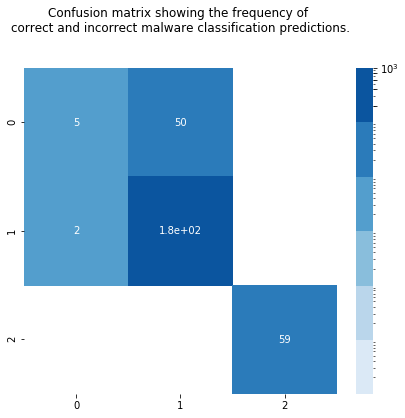

In [225]:
print("Score: ", trained_model.score(x_train, y_train))
confusion_matrix = pd.DataFrame(
    data=metrics.confusion_matrix(y_test, y_pred), 
)
confusion_figure, confusion_axes = matplotlib.pyplot.subplots()
confusion_figure.set_size_inches(7, 6)
confusion_axes.set_title(
    'Confusion matrix showing the frequency of \n'
    'correct and incorrect malware classification predictions.'
    '\n\n'  # hack to avoid overlap with x-axis labels below
)
sns.heatmap(confusion_matrix, cmap=sns.color_palette("Blues"),annot=True,norm=LogNorm(confusion_matrix.min().min(),confusion_matrix.max().max()),
            vmin = 0.001, vmax=1000)

In [226]:
from sklearn.metrics import classification_report

target_names = ['normal', 'malware']
print(classification_report(y_test, y_pred, target_names=target_names))

ValueError: Number of classes, 3, does not match size of target_names, 2. Try specifying the labels parameter

## SVM

In [983]:
from sklearn import svm
clf = svm.SVC(gamma='scale')
clf.fit(x_train, y_train)  

y_pred_svm = clf.predict(x_test)

print("Number of mislabeled points out of a total %d points : %d"
       % (x_test.shape[0],(y_test != y_pred_svm).sum()))
print("Accuracy" + str((y_test != y_pred_svm).sum()/x_test.shape[0]))

Number of mislabeled points out of a total 287 points : 43
Accuracy0.14982578397212543


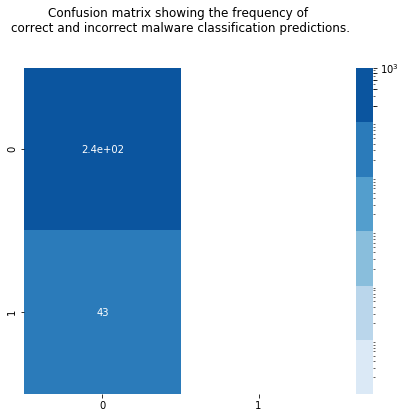

In [984]:
confusion_matrix = pd.DataFrame(
    data=metrics.confusion_matrix(y_test, y_pred_svm), 
)
confusion_figure, confusion_axes = matplotlib.pyplot.subplots()
confusion_figure.set_size_inches(7, 6)
confusion_axes.set_title(
    'Confusion matrix showing the frequency of \n'
    'correct and incorrect malware classification predictions.'
    '\n\n'  # hack to avoid overlap with x-axis labels below
)
sns.heatmap(confusion_matrix, cmap=sns.color_palette("Blues"),annot=True,norm=LogNorm(confusion_matrix.min().min(),confusion_matrix.max().max()),
            vmin = 0.001, vmax=1000)

## Naive Bayes¶

In [814]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test)

print("Number of mislabeled points out of a total %d points : %d"
       % (x_test.shape[0],(y_test != y_pred).sum()))
print("Accuracy " + str(1- (y_test != y_pred).sum()/x_test.shape[0]))

Number of mislabeled points out of a total 291 points : 171
Accuracy 0.41237113402061853


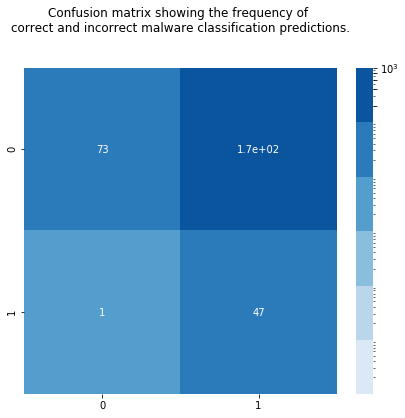

In [815]:
confusion_matrix = pd.DataFrame(
    data=metrics.confusion_matrix(y_test, y_pred), 
)
confusion_figure, confusion_axes = matplotlib.pyplot.subplots()
confusion_figure.set_size_inches(7, 6)
confusion_axes.set_title(
    'Confusion matrix showing the frequency of \n'
    'correct and incorrect malware classification predictions.'
    '\n\n'  # hack to avoid overlap with x-axis labels below
)
sns.heatmap(confusion_matrix, cmap=sns.color_palette("Blues"),annot=True,norm=LogNorm(confusion_matrix.min().min(),confusion_matrix.max().max()),
            vmin = 0.001, vmax=1000)

## KNN

In [985]:
from sklearn.neighbors import KNeighborsClassifier 

knn = KNeighborsClassifier(n_neighbors=3,weights = 'distance')
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='distance')

In [986]:
score=knn.score(x_test,y_test)
y_pred = knn.predict(x_test)
score

0.9059233449477352

In [987]:
metrics.recall_score(y_test, y_pred, average='micro')

0.9059233449477352

In [988]:
from sklearn.metrics import classification_report

target_names = ['normal', 'malware']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      normal       0.90      1.00      0.95       244
     malware       0.94      0.40      0.56        43

   micro avg       0.91      0.91      0.91       287
   macro avg       0.92      0.70      0.75       287
weighted avg       0.91      0.91      0.89       287



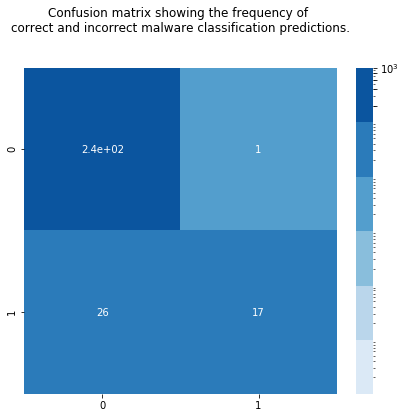

In [989]:
confusion_matrix = pd.DataFrame(
    data=metrics.confusion_matrix(y_test, y_pred), 
)
confusion_figure, confusion_axes = matplotlib.pyplot.subplots()
confusion_figure.set_size_inches(7, 6)
confusion_axes.set_title(
    'Confusion matrix showing the frequency of \n'
    'correct and incorrect malware classification predictions.'
    '\n\n'  # hack to avoid overlap with x-axis labels below
)
sns.heatmap(confusion_matrix, cmap=sns.color_palette("Blues"),annot=True,norm=LogNorm(confusion_matrix.min().min(),confusion_matrix.max().max()),
            vmin = 0.001, vmax=1000)

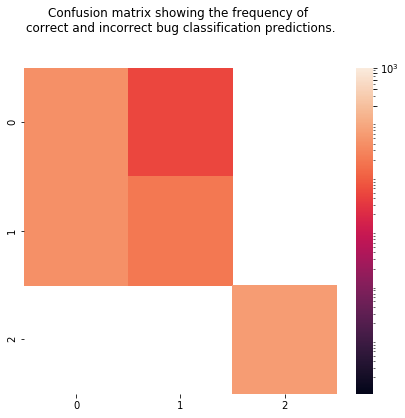

In [318]:
confusion_matrix = pd.DataFrame(
    data=metrics.confusion_matrix(y_test, y_pred), 
)
confusion_figure, confusion_axes = matplotlib.pyplot.subplots()
confusion_figure.set_size_inches(7, 6)
confusion_axes.set_title(
    'Confusion matrix showing the frequency of \n'
    'correct and incorrect bug classification predictions.'
    '\n\n'  # hack to avoid overlap with x-axis labels below
)
sns.heatmap(confusion_matrix, norm=LogNorm(confusion_matrix.min().min(),confusion_matrix.max().max()),
            vmin = 0.001, vmax=1000)

## Neural network

In [21]:
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import RMSprop, Adadelta, Adam
base_model = Sequential()
base_model.add(Dense(55, input_dim=x_train.shape[1], activation='sigmoid'))
base_model.add(Dense(55, activation='sigmoid'))
base_model.add(Dense(units=pd.get_dummies(y_train).shape[1], activation='softmax'))


Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [32]:
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 55)                3080      
_________________________________________________________________
dense_12 (Dense)             (None, 55)                3080      
_________________________________________________________________
dense_13 (Dense)             (None, 3)                 168       
Total params: 6,328
Trainable params: 6,328
Non-trainable params: 0
_________________________________________________________________


In [33]:
base_model.compile(optimizer=Adadelta(), loss='categorical_crossentropy', metrics=['categorical_accuracy'])
base_model.fit(x_train, pd.get_dummies(y_train), epochs=20, batch_size=64)

Epoch 1/20
1180/1180 [==============================] - 0s 252us/step - loss: 0.9384 - categorical_accuracy: 0.6178
Epoch 2/20
1180/1180 [==============================] - 0s 19us/step - loss: 0.9306 - categorical_accuracy: 0.6178
Epoch 3/20
1180/1180 [==============================] - 0s 24us/step - loss: 0.9309 - categorical_accuracy: 0.6178
Epoch 4/20
1180/1180 [==============================] - 0s 26us/step - loss: 0.9305 - categorical_accuracy: 0.6178
Epoch 5/20
1180/1180 [==============================] - 0s 25us/step - loss: 0.9303 - categorical_accuracy: 0.6178
Epoch 6/20
1180/1180 [==============================] - 0s 27us/step - loss: 0.9302 - categorical_accuracy: 0.6178
Epoch 7/20
1180/1180 [==============================] - 0s 27us/step - loss: 0.9287 - categorical_accuracy: 0.6178
Epoch 8/20
1180/1180 [==============================] - 0s 28us/step - loss: 0.9307 - categorical_accuracy: 0.6178
Epoch 9/20
1180/1180 [==============================] - 0s 27us/step - loss: 0.

In [34]:
base_model.evaluate(x_test,pd.get_dummies(y_test))

295/295 [==============================] - 0s 300us/step


[0.9166941307358822, 0.6271186444718959]

In [35]:
confusion_matrix = pd.DataFrame(
    data=metrics.confusion_matrix(y_test, y_pred), 
)
confusion_figure, confusion_axes = matplotlib.pyplot.subplots()
confusion_figure.set_size_inches(7, 6)
confusion_axes.set_title(
    'Confusion matrix showing the frequency of \n'
    'correct and incorrect malware classification predictions.'
    '\n\n'  # hack to avoid overlap with x-axis labels below
)
sns.heatmap(confusion_matrix, cmap=sns.color_palette("Blues"),annot=True,norm=LogNorm(confusion_matrix.min().min(),confusion_matrix.max().max()),
            vmin = 0.001, vmax=1000)

NameError: name 'metrics' is not defined

In [35]:
list(flat([[1,2,[2]],[1]]))

[1, 2, 2, 1]

## 20 neural

In [754]:
def flat(l):
    for k in l:
        if not isinstance(k, (list, tuple)):
            yield k
        else:
            yield from flat(k)

In [755]:
def new_data_generation(data, label):
    df = []
    y = []
    for k in range(len(data)-80):
        temp = []
        score = 0
        for i in range(80):
            temp.extend(data.iloc[i+k])
            score += label[i+k]
        df.append(temp)
        y.append(score)
    return df,y

In [83]:
a = labels =='mal'

In [84]:
df, y = new_data_generation(all_data, a)

In [85]:
df = pd.DataFrame(df)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,4390,4391,4392,4393,4394,4395,4396,4397,4398,4399
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0


In [86]:
y = pd.DataFrame(y)>45

In [87]:
y.head()

,0
0,True
1,True
2,True
3,True
4,True


In [88]:
y = y[0].values

In [89]:
from sklearn.model_selection import train_test_split

labels= label.values.ravel() # this becomes a 'horizontal' array
# Use small numbers for slow classifiers, as KNN, Radius, SVC,...
x_train, x_test, y_train, y_test = train_test_split(df, y, train_size=0.8, test_size=0.2)
print("X_train, y_train:", x_train.shape, y_train.shape)
print("X_test, y_test:", x_test.shape, y_test.shape)

X_train, y_train: (1116, 4400) (1116,)
X_test, y_test: (279, 4400) (279,)


In [947]:
len(df[0])

1465

In [948]:
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import RMSprop, Adadelta, Adam
base_model = Sequential()
base_model.add(Dense(1100, input_dim=df.shape[1], activation='sigmoid'))
base_model.add(Dense(20, activation='sigmoid'))

base_model.add(Dense(20, activation='sigmoid'))

base_model.add(Dense(20, activation='sigmoid'))

base_model.add(Dense(20, activation='sigmoid'))

base_model.add(Dense(20, activation='sigmoid'))

base_model.add(Dense(20, activation='sigmoid'))

base_model.add(Dense(units=2, activation='sigmoid'))


In [949]:
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_220 (Dense)            (None, 1100)              606100    
_________________________________________________________________
dense_221 (Dense)            (None, 20)                22020     
_________________________________________________________________
dense_222 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_223 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_224 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_225 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_226 (Dense)            (None, 20)                420       
__________

In [950]:
from sklearn import preprocessing #标准化数据模块
import numpy as np

In [951]:
base_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
base_model.fit(x_train, pd.get_dummies(y_train), epochs=20, batch_size=32)

Epoch 1/20
1172/1172 [==============================] - 4s 3ms/step - loss: 0.4801 - acc: 0.8396
Epoch 2/20
1172/1172 [==============================] - 0s 288us/step - loss: 0.4401 - acc: 0.8396
Epoch 3/20
1172/1172 [==============================] - 0s 286us/step - loss: 0.4407 - acc: 0.8396
Epoch 4/20
1172/1172 [==============================] - 0s 287us/step - loss: 0.4407 - acc: 0.8396
Epoch 5/20
1172/1172 [==============================] - 0s 272us/step - loss: 0.4408 - acc: 0.8396
Epoch 6/20
1172/1172 [==============================] - 0s 274us/step - loss: 0.4410 - acc: 0.8396
Epoch 7/20
1172/1172 [==============================] - 0s 265us/step - loss: 0.4406 - acc: 0.8396
Epoch 8/20
1172/1172 [==============================] - 0s 286us/step - loss: 0.4406 - acc: 0.8396
Epoch 9/20
1172/1172 [==============================] - 0s 282us/step - loss: 0.4409 - acc: 0.8396
Epoch 10/20
1172/1172 [==============================] - 0s 276us/step - loss: 0.4405 - acc: 0.8396
Epoch 11/20

In [952]:
base_model.evaluate(x_test,pd.get_dummies(y_test))

293/293 [==============================] - 1s 5ms/step


[0.44035251443703427, 0.8395904436860068]

In [953]:
1- sum(y_train)/len(y_train)

0.8395904436860069

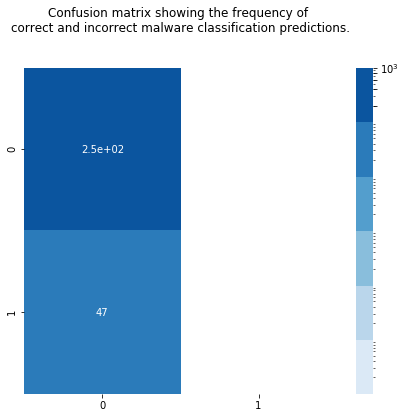

In [955]:
y_pred = base_model.predict_classes(x_test)
confusion_matrix = pd.DataFrame(
    data=metrics.confusion_matrix(y_test, y_pred), 
)
confusion_figure, confusion_axes = matplotlib.pyplot.subplots()
confusion_figure.set_size_inches(7, 6)
confusion_axes.set_title(
    'Confusion matrix showing the frequency of \n'
    'correct and incorrect malware classification predictions.'
    '\n\n'  # hack to avoid overlap with x-axis labels below
)
sns.heatmap(confusion_matrix, cmap=sns.color_palette("Blues"),annot=True,norm=LogNorm(confusion_matrix.min().min(),confusion_matrix.max().max()),
            vmin = 0.001, vmax=1000)

## CNN

In [78]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape, GlobalAveragePooling1D
from keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D
from keras.utils import np_utils
TIME_PERIODS = 80
num_sensors = 55
input_shape = 80*55
num_classes= 2

In [94]:
model_m = Sequential()
model_m.add(Reshape((TIME_PERIODS, num_sensors), input_shape=(input_shape,)))
model_m.add(Conv1D(100, 10, activation='relu', input_shape=(TIME_PERIODS, num_sensors)))
model_m.add(Conv1D(100, 10, activation='relu'))
model_m.add(MaxPooling1D(3))
model_m.add(Conv1D(160, 10, activation='relu'))
model_m.add(Conv1D(160, 10, activation='relu'))
model_m.add(GlobalAveragePooling1D())
model_m.add(Dropout(0.5))
model_m.add(Dense(num_classes, activation='softmax'))
print(model_m.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_25 (Reshape)         (None, 80, 55)            0         
_________________________________________________________________
conv1d_57 (Conv1D)           (None, 71, 100)           55100     
_________________________________________________________________
conv1d_58 (Conv1D)           (None, 62, 100)           100100    
_________________________________________________________________
max_pooling1d_19 (MaxPooling (None, 20, 100)           0         
_________________________________________________________________
conv1d_59 (Conv1D)           (None, 11, 160)           160160    
_________________________________________________________________
conv1d_60 (Conv1D)           (None, 2, 160)            256160    
_________________________________________________________________
global_average_pooling1d_7 ( (None, 160)               0         
__________

In [98]:
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='best_model.{epoch:02d}-{val_loss:.2f}.h5',
        monitor='val_loss', save_best_only=True),
    keras.callbacks.EarlyStopping(monitor='acc', patience=1)
]

model_m.compile(loss='categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])

BATCH_SIZE = 32
EPOCHS = 50

history = model_m.fit(x_train,
                      pd.get_dummies(y_train),
                      batch_size=BATCH_SIZE,
                      epochs=EPOCHS,
                      callbacks=callbacks_list,
                      validation_split=0.2,
                      verbose=1)


Train on 892 samples, validate on 224 samples
Epoch 1/50
892/892 [==============================] - 2s 2ms/step - loss: 2.2587 - acc: 0.8599 - val_loss: 2.5904 - val_acc: 0.8393
Epoch 2/50
892/892 [==============================] - 1s 1ms/step - loss: 2.2587 - acc: 0.8599 - val_loss: 2.5904 - val_acc: 0.8393


In [100]:
model_m.evaluate(x_test,pd.get_dummies(y_test))

279/279 [==============================] - 0s 305us/step


[1.9642123466751482, 0.8781361992213889]

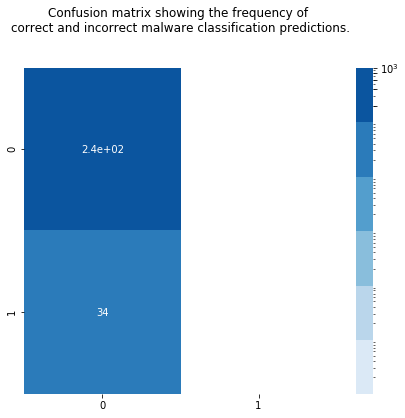

In [102]:
y_pred = model_m.predict_classes(x_test)
confusion_matrix = pd.DataFrame(
    data=metrics.confusion_matrix(y_test, y_pred), 
)
confusion_figure, confusion_axes = matplotlib.pyplot.subplots()
confusion_figure.set_size_inches(7, 6)
confusion_axes.set_title(
    'Confusion matrix showing the frequency of \n'
    'correct and incorrect malware classification predictions.'
    '\n\n'  # hack to avoid overlap with x-axis labels below
)
sns.heatmap(confusion_matrix, cmap=sns.color_palette("Blues"),annot=True,norm=LogNorm(confusion_matrix.min().min(),confusion_matrix.max().max()),
            vmin = 0.001, vmax=1000)

# RNN

In [27]:
dataset = pd.read_csv("../data/collected/networkmonitor.csv")

In [28]:
dataset

,Timestamp,Socket Connection Test,HTTP Connection Test,Network Type,Mobile Data Network Type,SIM State,Service State,Detailed State,Is Connected,Is Roaming,...,LTE Cell Id,LTE Cell RF Channel,LTE Physical Cell Id,LTE Cell Tracking Area Code,Network Interface,IPv4 Address,IPv6 Address,Battery Level,Download Speed (Mbps),Upload Speed (Mbps)
0,2019-07-22 10:26:59,FAIL,FAIL,MOBILE/LTE,LTE,READY,IN_SERVICE,CONNECTED,1,0,...,NaN,NaN,NaN,NaN,eth0,10.0.2.15,fec0::5054:ff:fe12:3456;fe80::5054:ff:fe12:345...,100,Disabled,Disabled
1,2019-07-22 10:26:49,FAIL,FAIL,MOBILE/LTE,LTE,READY,IN_SERVICE,CONNECTED,1,0,...,NaN,NaN,NaN,NaN,eth0,10.0.2.15,fec0::5054:ff:fe12:3456;fe80::5054:ff:fe12:345...,100,Disabled,Disabled
2,2019-07-22 10:26:39,FAIL,FAIL,MOBILE/LTE,LTE,READY,IN_SERVICE,CONNECTED,1,0,...,NaN,NaN,NaN,NaN,eth0,10.0.2.15,fec0::5054:ff:fe12:3456;fe80::5054:ff:fe12:345...,100,Disabled,Disabled
3,2019-07-22 10:26:29,FAIL,FAIL,MOBILE/LTE,LTE,READY,IN_SERVICE,CONNECTED,1,0,...,NaN,NaN,NaN,NaN,eth0,10.0.2.15,fec0::5054:ff:fe12:3456;fe80::5054:ff:fe12:345...,100,Disabled,Disabled
4,2019-07-22 10:26:19,FAIL,FAIL,MOBILE/LTE,LTE,READY,IN_SERVICE,CONNECTED,1,0,...,NaN,NaN,NaN,NaN,eth0,10.0.2.15,fec0::5054:ff:fe12:3456;fe80::5054:ff:fe12:345...,100,Disabled,Disabled
5,2019-07-22 10:26:09,FAIL,FAIL,MOBILE/LTE,LTE,READY,IN_SERVICE,CONNECTED,1,0,...,NaN,NaN,NaN,NaN,eth0,10.0.2.15,fec0::5054:ff:fe12:3456;fe80::5054:ff:fe12:345...,100,Disabled,Disabled
6,2019-07-22 10:25:59,FAIL,FAIL,MOBILE/LTE,LTE,READY,IN_SERVICE,CONNECTED,1,0,...,NaN,NaN,NaN,NaN,eth0,10.0.2.15,fec0::5054:ff:fe12:3456;fe80::5054:ff:fe12:345...,100,Disabled,Disabled
7,2019-07-22 10:25:49,FAIL,FAIL,MOBILE/LTE,LTE,READY,IN_SERVICE,CONNECTED,1,0,...,NaN,NaN,NaN,NaN,eth0,10.0.2.15,fec0::5054:ff:fe12:3456;fe80::5054:ff:fe12:345...,100,Disabled,Disabled
8,2019-07-22 10:25:39,FAIL,FAIL,MOBILE/LTE,LTE,READY,IN_SERVICE,CONNECTED,1,0,...,NaN,NaN,NaN,NaN,eth0,10.0.2.15,fec0::5054:ff:fe12:3456;fe80::5054:ff:fe12:345...,100,Disabled,Disabled
9,2019-07-22 10:25:29,FAIL,FAIL,MOBILE/LTE,LTE,READY,IN_SERVICE,CONNECTED,1,0,...,NaN,NaN,NaN,NaN,eth0,10.0.2.15,fec0::5054:ff:fe12:3456;fe80::5054:ff:fe12:345...,100,Disabled,Disabled


In [68]:
dataset = pd.read_csv("../data/collected/networkmonitor1032.csv")

In [31]:
dataset = pd.concat([dataset, pd.read_csv("../data/collected/networkmonitor.csv")])

In [32]:
dataset = pd.read_excel("../data/collected/networkmonitor.xls")

In [33]:
dataset = dataset.fillna(0)

In [34]:
col = ['Socket Connection Test','HTTP Connection Test','Network Type','Mobile Data Network Type','SIM State','Service State','Detailed State','Network Interface','IPv4 Address','IPv6 Address','Download Speed (Mbps)','Upload Speed (Mbps)','Data Activity','Data State','Extra Info','Reason','SIM Operator','Network Operator']
for i in col:
    dataset[i] = pd.factorize(dataset[i])[0]

In [35]:
dataset = dataset.sort_values('Timestamp')
dataset = dataset.drop('Timestamp',axis = 1)

In [70]:
dataset

,Total CPU usage (%),SeraphimDroid Memory (kB),Memory used (kB),Memory available (MemFree+Cached) (kB),MemFree (kB),Cached (kB),mycpu
0,2.551020,39376,442376,1108172,371304,736868,1.530612
1,4.796163,39376,445180,1105368,368796,736572,2.398081
2,3.233831,39376,445196,1105352,368900,736452,1.492537
3,1.990050,39376,445236,1105312,368860,736452,1.243781
4,2.000000,39376,445344,1105204,368752,736452,1.250000
5,5.582524,39376,445352,1105196,368744,736452,2.669903
6,4.477612,39376,445004,1105544,369100,736444,2.985075
7,2.238806,39376,444972,1105576,369124,736452,1.741294
8,2.227723,39376,444972,1105576,369124,736452,1.485148
9,3.000000,39376,444964,1105584,369132,736452,1.000000


In [13]:
dataset = all_data

NameError: name 'all_data' is not defined

In [37]:
raw_data = dataset

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import  pandas as pd
import  os
from keras.models import Sequential, load_model
from sklearn.preprocessing import MinMaxScaler

In [72]:
import matplotlib.pyplot as plt
import time
import csv
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
np.random.seed(2019)

In [86]:
temp = raw_data.copy()

In [107]:
raw_data = np.array(temp.drop(['SeraphimDroid Memory (kB)'],axis = 1))

In [123]:
dataset = raw_data

In [16]:
np.array(preprocessing.scale(all_data))

NameError: name 'preprocessing' is not defined

In [93]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [124]:
def create_dataset(dataset, look_back):
#这里的look_back与timestep相同
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    #import pdb; pdb.set_trace()
    return np.array(dataX),np.array(dataY)
#训练数据太少 look_back并不能过大
look_back = 20
trainX,trainY  = create_dataset(dataset,look_back)

In [125]:
trainY[0]

array([ 4.18399007e+00,  3.53821425e-03, -3.53821425e-03, -2.58756150e+00,
        2.88203455e+00, -2.98664107e+00])

In [126]:
(x_train.shape[0], x_train.shape[1])

NameError: name 'x_train' is not defined

In [127]:
trainX

array([[[ 7.73580406e-01, -4.99984310e-01,  4.99984310e-01,
         -2.48784204e+00,  3.56661054e+00,  1.06719509e+00],
        [ 1.41395005e+00, -6.26692816e-01,  6.26692816e-01,
         -2.47599418e+00,  3.75366370e+00, -7.05697104e-01],
        [ 2.40685910e+00, -6.12749652e-01,  6.12749652e-01,
         -2.49105083e+00,  3.74842952e+00, -2.56346150e+00],
        ...,
        [ 4.50772646e+00, -6.39629038e-03,  6.39629038e-03,
         -2.57670097e+00,  2.88561583e+00, -3.50163010e+00],
        [ 4.08321594e+00,  1.52156144e-02, -1.52156144e-02,
         -2.60582695e+00,  2.88396293e+00, -3.49459631e+00],
        [ 3.45047505e+00,  5.62968891e-03, -5.62968891e-03,
         -2.59052347e+00,  2.88203455e+00, -3.99681187e+00]],

       [[ 1.41395005e+00, -6.26692816e-01,  6.26692816e-01,
         -2.47599418e+00,  3.75366370e+00, -7.05697104e-01],
        [ 2.40685910e+00, -6.12749652e-01,  6.12749652e-01,
         -2.49105083e+00,  3.74842952e+00, -2.56346150e+00],
        [ 1.14840

In [178]:
(trainX.shape[0], trainX.shape[1], s)

(16732, 20, 6)

In [184]:
from keras.layers import Input, Dense, LSTM
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras import regularizers

input_dim = 6
encoding_dim = 5
num_epoch = 5
batch_size = 32

trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], s))


input_layer = Input(shape=(20,s, ), name="input")
lstm = LSTM(4, input_shape=(None,s))(input_layer)
output = Dense(s,name = "output")(lstm)
LS = Model(inputs=input_layer, outputs=output)
LS.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['mae'])
checkpointer = ModelCheckpoint(filepath="test.h5",
                               verbose=0,
                               save_best_only=True)
history = LS.fit(trainX, trainY,
                          epochs=num_epoch,
                          batch_size=batch_size,
                          shuffle=True,
                          validation_data=(trainX, trainY),
                          verbose=1).history

Train on 16732 samples, validate on 16732 samples
Epoch 1/5
16732/16732 [==============================] - 11s 635us/step - loss: 0.6045 - mean_absolute_error: 0.4020 - val_loss: 0.4291 - val_mean_absolute_error: 0.3135
Epoch 2/5
16732/16732 [==============================] - 8s 504us/step - loss: 0.3393 - mean_absolute_error: 0.2775 - val_loss: 0.2513 - val_mean_absolute_error: 0.2426
Epoch 3/5
16732/16732 [==============================] - 9s 544us/step - loss: 0.1975 - mean_absolute_error: 0.2153 - val_loss: 0.1626 - val_mean_absolute_error: 0.1949
Epoch 4/5
16732/16732 [==============================] - 9s 543us/step - loss: 0.1483 - mean_absolute_error: 0.1835 - val_loss: 0.1341 - val_mean_absolute_error: 0.1744
Epoch 5/5
16732/16732 [==============================] - 10s 568us/step - loss: 0.1264 - mean_absolute_error: 0.1671 - val_loss: 0.1194 - val_mean_absolute_error: 0.1614


In [164]:
s = 6
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], s))
#testX = np.reshape(testX, (testX.shape[0], testX.shape[1] ,1 ))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(None,s),name = "input"))
model.add(Dense(s,activation = "relu"))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=20, batch_size=64, verbose=2)

Epoch 1/10
 - 5s - loss: 0.8602
Epoch 2/10
 - 4s - loss: 0.7492
Epoch 3/10
 - 3s - loss: 0.7103
Epoch 4/10
 - 3s - loss: 0.6844
Epoch 5/10
 - 3s - loss: 0.6601
Epoch 6/10
 - 4s - loss: 0.6441
Epoch 7/10
 - 4s - loss: 0.6337
Epoch 8/10
 - 3s - loss: 0.6268
Epoch 9/10
 - 3s - loss: 0.6217
Epoch 10/10
 - 4s - loss: 0.6186


In [186]:
LS.save('model_RNN.h5')   # HDF5 file, you have to pip3 install h5py if don't have it


In [185]:
LS.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 20, 6)             0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 4)                 176       
_________________________________________________________________
output (Dense)               (None, 6)                 30        
Total params: 206
Trainable params: 206
Non-trainable params: 0
_________________________________________________________________


In [187]:
trainPredict = model.predict(trainX)

In [144]:
#反归一化
trainPredict = scaler.inverse_transform(trainPredict)

In [103]:
Y = scaler.inverse_transform(trainY)

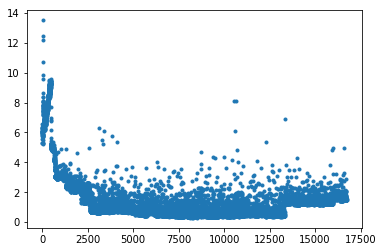

In [189]:
from scipy.spatial import distance

dst = []
for i in range(len(trainY)):
    dst.append(distance.euclidean(trainY[i], trainPredict[i]))
    
plt.plot(dst,'.')

In [1381]:
dst

[12910.563732179098,
 13060.98225717836,
 13982.467834634414,
 13986.860347320013,
 13081.259960571813,
 13731.670492272076,
 11128.301258362779,
 11332.370343092787,
 13703.50438992203,
 13492.06598955768,
 12456.538594313583,
 13545.189590207037,
 11727.186516023876,
 11528.58520604065,
 12222.040895547047,
 12000.505104842949,
 11892.70586293013,
 10907.636551353273,
 10756.98394384466,
 10247.889370168525,
 10841.397122065302,
 12350.05848111473,
 9384.191022857722,
 10908.115579217429,
 12130.19647225972,
 11636.36532808992,
 12490.389708712335,
 11327.212984550686,
 11241.910145924037,
 11515.185630043477,
 10132.445427635184,
 10128.11009856661,
 11638.367676157399,
 10930.91286112287,
 11402.322878657174,
 11806.524008797196,
 12338.207941825813,
 12345.145524962667,
 13087.175627995457,
 12180.723779837248,
 12566.873131867225,
 14100.006454737955,
 12586.2982094208,
 20891.45382198964,
 44785.68617214869,
 35295.446870595435,
 36440.293269900845,
 51626.99439917585,
 57640.11

In [1382]:
dst = np.array(dst)
dst = dst/max(dst)

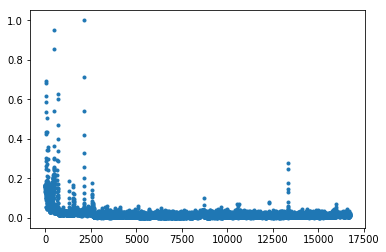

In [1383]:
plt.plot(dst,'.')

In [1384]:
index = []
for i in range(len(dst)):
    if dst[i]>0.5:
        index.append(i)


In [1385]:
index

[44, 47, 48, 49, 50, 76, 477, 478, 479, 686, 687, 2105, 2106, 2107]

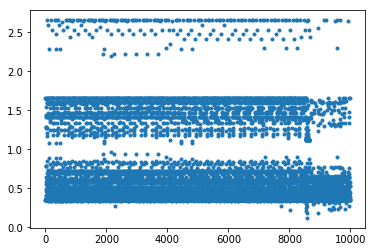

In [401]:
from scipy.spatial import distance

dst = []
for i in range(len(trainY)):
    dst.append(distance.euclidean(Y[i], trainPredict[i]))
    
plt.plot(dst,'.')

In [429]:
len(trainY)

1454

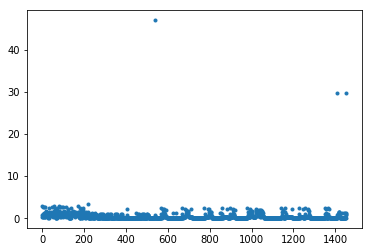

In [434]:
from scipy.spatial import distance

dst = []
for i in range(len(trainY)):
    dst.append(distance.euclidean(trainY[i], trainPredict[i]))
    
plt.plot(dst,'.')

In [ ]:
e = [abs(y_h-y_t[0]) for y_h,y_t in zip(y_hat, y_test)]


In [427]:
len(all_data)

1475

In [426]:
len(trainPredict)

1454

In [ ]:
result = []
for index in raange(len(bike) - sequence_length):
    result.append(bike[index: index + sequence_length])
result = np.array(result)

In [361]:
inputs = Input(shape=(x_train.shape[1], x_train.shape[2]))
lstm = Bidirectional(LSTM(64, return_sequences=True, dropout=0.3))(inputs, training = True)
lstm = Bidirectional(LSTM(16, return_sequences=False, dropout=0.3))(lstm, training = True)
dense = Dense(50)(lstm)
out10 = Dense(1)(dense)
out50 = Dense(1)(dense)
out90 = Dense(1)(dense)
model = Model(inputs, [out10,out50,out90])

IndexError: tuple index out of range

In [342]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099
271,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0
139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0
791,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0
13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0
697,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0
377,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0
518,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0
111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0
633,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0
645,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0


In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras import regularizers

input_dim = 6
encoding_dim = 20
num_epoch = 20
batch_size = 32

input_layer = Input(shape=(input_dim, ), name="input")
encoder = Dense(encoding_dim, activation="tanh", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu',name="output")(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['mae'])
checkpointer = ModelCheckpoint(filepath="SofaSofa_model.h5",
                               verbose=0,
                               save_best_only=True)
history = autoencoder.fit(raw_data, raw_data,
                          epochs=num_epoch,
                          batch_size=batch_size,
                          shuffle=True,
                          validation_data=(raw_data, raw_data),
                          verbose=1).history